In [1]:
library(haven)
library(tidyverse)
library(broom)
library(lme4) 
library(latex2exp)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats
Loading required package: Matrix

Attaching package: 'Matrix'

The following object is masked from 'package:tidyr':

    expand



In [2]:
AA_Sex_1 <- read_sav("C:/Users/Personal/AA leche/datos/AMINOACIDOS POR SEXO_1.sav")
head(AA_Sex_1) 

ID,GROUP,MATERNALAGE,SEXO,INFANTDOB,MATBMI1COLL,MATBMI215d,MATBMI32mos,MATBMI44mos,BABYWeigth1g,...,ALAGLOB,ASNGLOB,SYSGLOB,GLYGLOB,GLUGLOB,GLNGLOB,PROLINEGLOB,SERINEGLOB,TYRAMINEGLOB,new
1,0,17,1,2009-08-20,25,24,24,22,3492.7,...,21.25,0.5,1.00,10.00,87.25,23.25,2.75,8.0,1.00,0
2,0,16,2,2009-08-24,32,31,30,29,3392.9,...,18.25,0.0,0.75,13.75,100.50,40.50,2.50,9.5,0.75,0
3,0,17,2,2009-08-21,23,23,NA,NA,2993.8,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
4,0,16,2,2009-08-21,26,NA,NA,NA,3692.3,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
5,0,16,NA,2009-08-29,25,NA,NA,NA,3592.5,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
6,0,16,2,2009-08-27,29,28,30,31,3093.5,...,15.50,0.5,1.50,10.25,74.75,30.00,5.25,8.0,2.00,0


In [3]:
names(AA_Sex_1)

[1] "ID"                       "GROUP"                   
  [3] "MATERNALAGE"              "SEXO"                    
  [5] "INFANTDOB"                "MATBMI1COLL"             
  [7] "MATBMI215d"               "MATBMI32mos"             
  [9] "MATBMI44mos"              "BABYWeigth1g"            
 [11] "BABYWeigth2g"             "BABYWeigth3g"            
 [13] "BABYWeigth4g"             "HeadCircumcm1"           
 [15] "HCcm2"                    "HCcm3"                   
 [17] "HCcm4"                    "MATHeight1m"             
 [19] "MATHeight2m"              "MATHeight3m"             
 [21] "MATHeight4m"              "MATWeight1kg"            
 [23] "MATWeight2kg"             "MATWeight3kg"            
 [25] "MATWeight4kg"             "A.TOTALCALORIESKcal"     
 [27] "B.TOTALCALORIESKcal"      "A.PROTEINg"              
 [29] "B.PROTEINg"               "A.CHOg"                  
 [31] "B.CHOg"                   "A.LIPIDSg"               
 [33] "B.LIPIDSg"                "A.GLUCOSEmgdL"           
 [35] "B.GLUCOSEmgdL"            "A.CHOLESTEROLmgdL"       
 [37] "B.CHOLESTEROLmgdL"        "A.TRIGLYCERIDSmgdL"      
 [39] "B.TRIGLYCERIDmgdL"        "A.HDLmgdL"               
 [41] "B.HDLmgdL"                "A.LDLmgdL"               
 [43] "B.LDLmgdL"                "A.PROTEINSgdL"           
 [45] "B.PROTEINSgdL"            "A.ALBUMINgdL"            
 [47] "B.ALBUMINgdL"             "edadr"                   
 [49] "Grupos"                   "CALOSTRUMtotalAA"        
 [51] "TRANSITIONtotalAA"        "MATURE2mtotalAA"         
 [53] "MATURE4mtotalAA"          "CALOSTRUMessentialAA"    
 [55] "TRANSITIONessentialAA"    "MATURE2messentialAA"     
 [57] "MATURE4messentialAA"      "ARGCalostrum"            
 [59] "ARGTransition"            "ARGMature2m"             
 [61] "ARGMature4m"              "HISCalostrum"            
 [63] "HISTransition"            "HISMature2m"             
 [65] "HISMature4m"              "ILECalostrum"            
 [67] "ILETransition"            "ILEMature2m"             
 [69] "ILEMature4m"              "LEUCalostrum"            
 [71] "LEUTransition"            "LEUMature2m"             
 [73] "LEUMature4m"              "LYSCalostrum"            
 [75] "LYSTransition"            "LYSMature2m"             
 [77] "LYSMature4m"              "METCalostrum"            
 [79] "METTransition"            "METMature2m"             
 [81] "METMature4m"              "PHECalostrum"            
 [83] "PHETransition"            "PHEMature2m"             
 [85] "PHEMature4m"              "THRCalostrum"            
 [87] "THRTransition"            "THRMature2m"             
 [89] "THRMature4m"              "TRPCalostrum"            
 [91] "TRPTransition"            "TRPMature2m"             
 [93] "TRPMature4m"              "VALCalostrum"            
 [95] "VALTransition"            "VALMature2m"             
 [97] "VALMature4m"              "CALOSTRUMnonessentialAA" 
 [99] "TRANSITIONnonessentialAA" "MATURE2mnonessentialAA"  
[101] "MATURE4mnonessentialAA"   "ASPCalostrum"            
[103] "ASPTransition"            "ASPMature2m"             
[105] "ASPMature4m"              "ALACalostrum"            
[107] "ALATransition"            "ALAMature2m"             
[109] "ALAMature4m"              "ASNCalostrum"            
[111] "ASNTransition"            "ASNMature2m"             
[113] "ASNMature4m"              "CYSCalostrum"            
[115] "CYSTransition"            "CYSMature2m"             
[117] "CYSMature4m"              "GLYCalostrum"            
[119] "GLYTransition"            "GLYMature2m"             
[121] "GLYMature4m"              "GLUCalostrum"            
[123] "GLUTransition"            "GLUMature2m"             
[125] "GLUMature4m"              "GLNCalostrum"            
[127] "GLNTransition"            "GLNMature2m"             
[129] "GLNMature4m"              "PROCalostrum"            
[131] "PROTransition"            "PROMature2m"             
[133] "PROMature4m"              "SERCalos

In [4]:
#str(AA_Sex_1)

In [5]:
print('Essential AA \n')
names(AA_Sex_1)[58]
names(AA_Sex_1)[97]

print('Prolyne \n')
names(AA_Sex_1)[130]
names(AA_Sex_1)[133]

print('Non essential AA \n')
names(AA_Sex_1)[102]
names(AA_Sex_1)[141]

[1] "Essential AA \n"


[1] "ARGCalostrum"

[1] "VALMature4m"

[1] "Prolyne \n"


[1] "PROCalostrum"

[1] "PROMature4m"

[1] "Non essential AA \n"


[1] "ASPCalostrum"

[1] "TYRMature4m"

In [6]:
AA_E <- AA_Sex_1 %>%  select(id = ID, group = GROUP, age = MATERNALAGE, sex = SEXO, 62:97) %>%
                         mutate(id = factor(id), 
                                sex =  factor(sex, labels = c('girl', 'boy')),
                                group = factor(group, labels = c('teen', 'adult'))) 


names(AA_E)

Warning message:
"`as_dictionary()` is soft-deprecated as of rlang 0.3.0.
Please use `as_data_pronoun()` instead
This warning is displayed once per session."Warning message:
"`new_overscope()` is soft-deprecated as of rlang 0.2.0.
Please use `new_data_mask()` instead
This warning is displayed once per session."Warning message:
"The `parent` argument of `new_data_mask()` is deprecated.
The parent of the data mask is determined from either:

  * The `env` argument of `eval_tidy()`
  * Quosure environments when applicable
This warning is displayed once per session."Warning message:
"`overscope_clean()` is soft-deprecated as of rlang 0.2.0.
This warning is displayed once per session."

[1] "id"            "group"         "age"           "sex"          
 [5] "HISCalostrum"  "HISTransition" "HISMature2m"   "HISMature4m"  
 [9] "ILECalostrum"  "ILETransition" "ILEMature2m"   "ILEMature4m"  
[13] "LEUCalostrum"  "LEUTransition" "LEUMature2m"   "LEUMature4m"  
[17] "LYSCalostrum"  "LYSTransition" "LYSMature2m"   "LYSMature4m"  
[21] "METCalostrum"  "METTransition" "METMature2m"   "METMature4m"  
[25] "PHECalostrum"  "PHETransition" "PHEMature2m"   "PHEMature4m"  
[29] "THRCalostrum"  "THRTransition" "THRMature2m"   "THRMature4m"  
[33] "TRPCalostrum"  "TRPTransition" "TRPMature2m"   "TRPMature4m"  
[37] "VALCalostrum"  "VALTransition" "VALMature2m"   "VALMature4m"

In [7]:
AA_NE <- AA_Sex_1 %>%  select(id = ID, group = GROUP, age = MATERNALAGE, sex = SEXO, 58:61, 102:141) %>%
                         mutate(id = factor(id), 
                                sex =  factor(sex, labels = c('girl', 'boy')),
                                group = factor(group, labels = c('teen', 'adult'))) 

names(AA_NE)

[1] "id"            "group"         "age"           "sex"          
 [5] "ARGCalostrum"  "ARGTransition" "ARGMature2m"   "ARGMature4m"  
 [9] "ASPCalostrum"  "ASPTransition" "ASPMature2m"   "ASPMature4m"  
[13] "ALACalostrum"  "ALATransition" "ALAMature2m"   "ALAMature4m"  
[17] "ASNCalostrum"  "ASNTransition" "ASNMature2m"   "ASNMature4m"  
[21] "CYSCalostrum"  "CYSTransition" "CYSMature2m"   "CYSMature4m"  
[25] "GLYCalostrum"  "GLYTransition" "GLYMature2m"   "GLYMature4m"  
[29] "GLUCalostrum"  "GLUTransition" "GLUMature2m"   "GLUMature4m"  
[33] "GLNCalostrum"  "GLNTransition" "GLNMature2m"   "GLNMature4m"  
[37] "PROCalostrum"  "PROTransition" "PROMature2m"   "PROMature4m"  
[41] "SERCalostrum"  "SERTransition" "SERMature2m"   "SERMature4m"  
[45] "TYRCalostrum"  "TYRTransition" "TYRMature2m"   "TYRMature4m"

In [8]:
# Removing NAs
AA_E_Long <- AA_E %>% gather(weekNames, level, 5:length(names(AA_E))) 
AA_NE_Long <- AA_NE %>% gather(weekNames, level, 5:length(names(AA_NE))) 

head(AA_E_Long)

Warning message:
"attributes are not identical across measure variables; they will be dropped"Warning message:
"attributes are not identical across measure variables; they will be dropped"

id,group,age,sex,weekNames,level
1,teen,17,girl,HISCalostrum,2
2,teen,16,boy,HISCalostrum,1
3,teen,17,boy,HISCalostrum,2
4,teen,16,boy,HISCalostrum,1
5,teen,16,NA,HISCalostrum,1
6,teen,16,boy,HISCalostrum,1


In [9]:
AA_E_Long <- 
    AA_E_Long %>% 
        mutate(week = gsub(".*Calostrum.*", "1", weekNames)) %>%
        mutate(week = gsub(".*Transition.*", "2", week)) %>%
        mutate(week = gsub(".*Mature2m.*", "8", week)) %>%
        mutate(week = gsub(".*Mature4m.*", "16", week)) %>% 
        mutate(week = as.numeric(week))

AA_E_Long <- 
    AA_E_Long %>% 
        mutate(AA = gsub("Calostrum.*", "", weekNames)) %>%
        mutate(AA = gsub("Transition.*", "", AA)) %>%
        mutate(AA = gsub("Mature2m.*", "", AA)) %>%
        mutate(AA = gsub("Mature4m.*", "", AA))

head(AA_E_Long)

id,group,age,sex,weekNames,level,week,AA
1,teen,17,girl,HISCalostrum,2,1,HIS
2,teen,16,boy,HISCalostrum,1,1,HIS
3,teen,17,boy,HISCalostrum,2,1,HIS
4,teen,16,boy,HISCalostrum,1,1,HIS
5,teen,16,NA,HISCalostrum,1,1,HIS
6,teen,16,boy,HISCalostrum,1,1,HIS


In [10]:
AA_NE_Long <- 
    AA_NE_Long %>% 
        mutate(week = gsub(".*Calostrum.*", "1", weekNames)) %>%
        mutate(week = gsub(".*Transition.*", "2", week)) %>%
        mutate(week = gsub(".*Mature2m.*", "8", week)) %>%
        mutate(week = gsub(".*Mature4m.*", "16", week)) %>% 
        mutate(week = as.numeric(week))

AA_NE_Long <- 
    AA_NE_Long %>% 
        mutate(AA = gsub("Calostrum.*", "", weekNames)) %>%
        mutate(AA = gsub("Transition.*", "", AA)) %>%
        mutate(AA = gsub("Mature2m.*", "", AA)) %>%
        mutate(AA = gsub("Mature4m.*", "", AA))

head(AA_NE_Long)

id,group,age,sex,weekNames,level,week,AA
1,teen,17,girl,ARGCalostrum,1,1,ARG
2,teen,16,boy,ARGCalostrum,1,1,ARG
3,teen,17,boy,ARGCalostrum,1,1,ARG
4,teen,16,boy,ARGCalostrum,1,1,ARG
5,teen,16,NA,ARGCalostrum,2,1,ARG
6,teen,16,boy,ARGCalostrum,2,1,ARG


In [11]:
AA_E_Long %>% filter(id == 4) %>% head()

id,group,age,sex,weekNames,level,week,AA
4,teen,16,boy,HISCalostrum,1,1,HIS
4,teen,16,boy,HISTransition,NA,2,HIS
4,teen,16,boy,HISMature2m,NA,8,HIS
4,teen,16,boy,HISMature4m,NA,16,HIS
4,teen,16,boy,ILECalostrum,0,1,ILE
4,teen,16,boy,ILETransition,NA,2,ILE


Warning message:
"Removed 640 rows containing non-finite values (stat_density)."

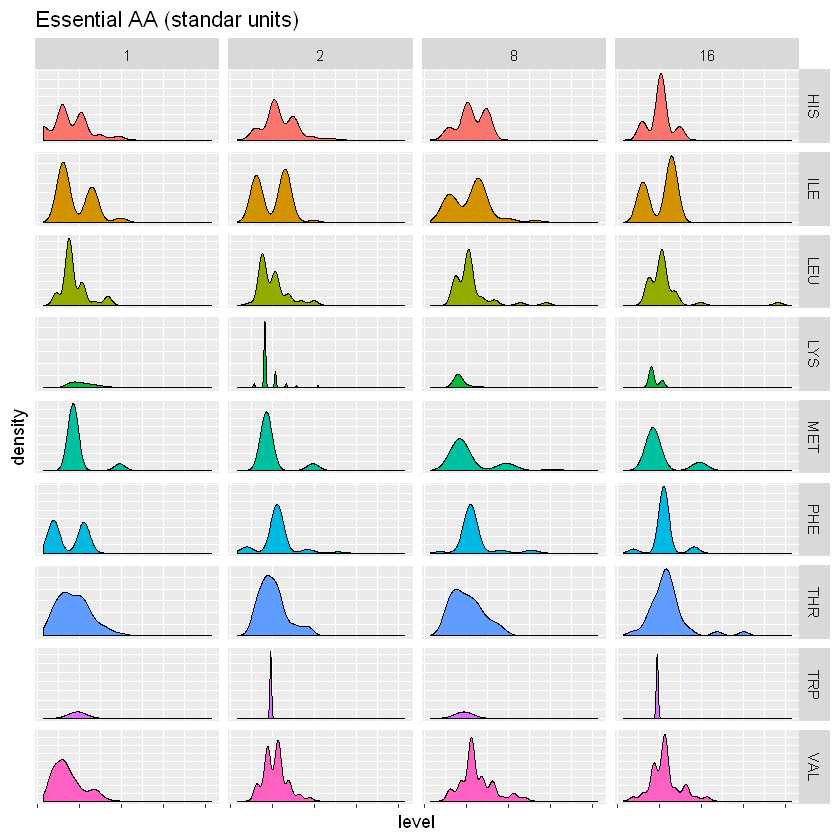

In [12]:
#png(filename="./plots/EAA_dist.png", units="cm", width=15, height=20, res = 300)

AA_E_Long_SU <- AA_E_Long %>% group_by(AA) %>% mutate(level = (level - mean(level, na.rm = TRUE))/sd(level, na.rm = TRUE))
 
ggplot(AA_E_Long_SU, aes(x = level, fill = AA)) + geom_density() + 
    guides(fill=FALSE) +
    facet_grid(AA ~ week, scales = "free_y") +
    theme( 
      #strip.background = element_blank(),
      axis.ticks.y = element_blank(),
      axis.text.y = element_blank(),
      axis.text.x = element_blank()
    ) + ggtitle('Essential AA (standar units)') 

#dev.off()


Warning message:
"Removed 781 rows containing non-finite values (stat_density)."

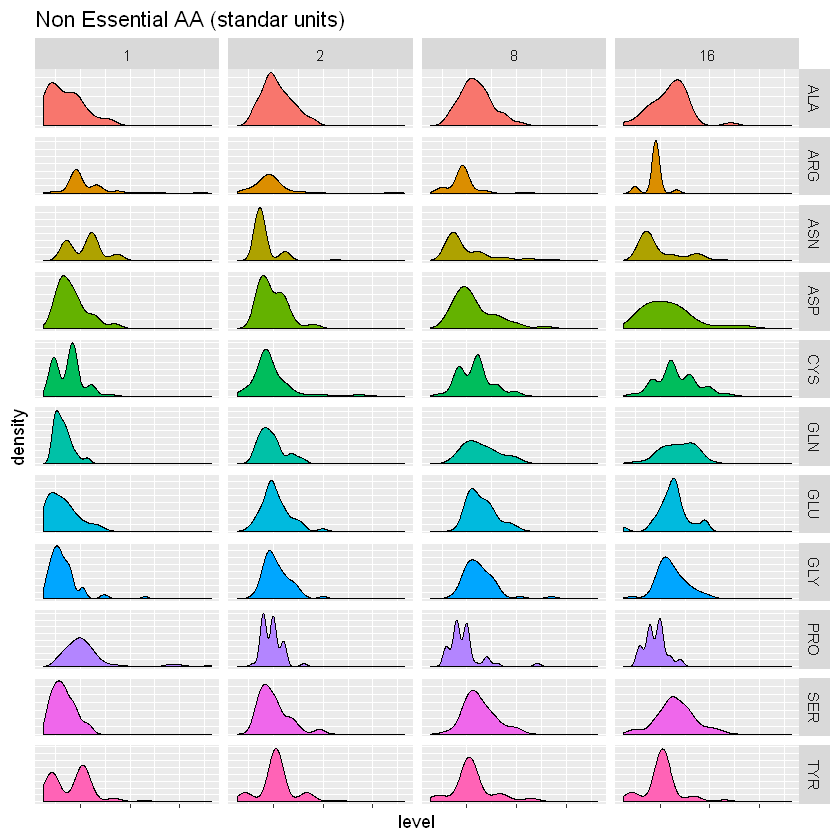

In [13]:
#png(filename="./plots/NEAA_dist.png", units="cm", width=15, height=20, res = 300)

AA_NE_Long_SU <- AA_NE_Long %>% group_by(AA) %>% mutate(level = (level - mean(level, na.rm = TRUE))/sd(level, na.rm = TRUE))

ggplot(AA_NE_Long_SU, aes(x = level, fill = AA)) + geom_density() + 
    guides(fill=FALSE) + 
    facet_grid(AA ~ week, scales = "free_y") +
    theme(
      #strip.background = element_blank(),
      axis.ticks.y = element_blank(),
      axis.text.y = element_blank(),
      axis.text.x = element_blank()
    ) + ggtitle('Non Essential AA (standar units)')

#dev.off()

In [14]:
AA_E_sum <- 
 AA_E_Long %>% group_by(week, AA) %>% 
    summarise(mean = mean(level, na.rm = T), sd = sd(level, na.rm = T)) %>% 
    mutate(mean = round(mean, 2), sd = round(sd, 2)) %>%
    mutate(mean = as.character(mean), sd = as.character(sd)) %>% 
    mutate(CI = paste(mean, '±', sd)) %>% 
    select(-mean, -sd) %>% 
    spread(week, CI)

AA_E_sum

AA,1,2,8,16
HIS,1.43 ± 0.98,2.29 ± 0.85,2.23 ± 0.71,1.95 ± 0.57
ILE,0.45 ± 0.59,0.56 ± 0.54,0.74 ± 0.68,0.62 ± 0.49
LEU,1.38 ± 1,1.79 ± 1.09,2.15 ± 1.39,2.19 ± 1.7
LYS,2.55 ± 2.21,1.38 ± 0.98,1.36 ± 0.99,1.27 ± 0.56
MET,0.09 ± 0.29,0.1 ± 0.31,0.23 ± 0.48,0.16 ± 0.37
PHE,0.48 ± 0.5,1 ± 0.51,1.13 ± 0.52,1.03 ± 0.37
THR,5.08 ± 3.05,6.15 ± 2.63,6.31 ± 2.9,7.68 ± 3.64
TRP,0.03 ± 0.17,0 ± 0,0.03 ± 0.16,0 ± 0
VAL,2.38 ± 1.34,3.73 ± 1.09,4.54 ± 1.6,4.05 ± 1.39


In [15]:
dft <- AA_E_Long %>% group_by(week) %>% 
    summarise(mean = mean(level, na.rm = T), sd = sd(level, na.rm = T)) %>% 
    mutate(mean = round(mean, 2), sd = round(sd, 2)) %>% 
    mutate(mean = as.character(mean), sd = as.character(sd)) %>% mutate(CI = paste(mean, '±', sd)) %>% 
    select(-mean, -sd) %>% spread(week, CI) 

cbind(AA = 'Total', dft)
#rbind(AA_E_sum, cbind(AA = 'Total', dft))

AA,1,2,8,16
Total,1.54 ± 2.09,1.89 ± 2.18,2.08 ± 2.36,2.11 ± 2.71


In [16]:
AA_NE_sum <- 
 AA_NE_Long %>% group_by(week, AA) %>% 
    summarise(mean = mean(level, na.rm = T), sd = sd(level, na.rm = T)) %>% 
    mutate(mean = round(mean, 2), sd = round(sd, 2)) %>%
    mutate(mean = as.character(mean), sd = as.character(sd)) %>% 
    mutate(CI = paste(mean, '±', sd)) %>% 
    select(-mean, -sd) %>% 
    spread(week, CI)

AA_NE_sum

AA,1,2,8,16
ALA,12.12 ± 9.02,20.98 ± 7.65,24 ± 8.15,24.11 ± 9.67
ARG,1.54 ± 1.15,1.12 ± 1.06,1 ± 0.69,0.95 ± 0.4
ASN,0.75 ± 0.66,0.21 ± 0.54,0.62 ± 1.02,0.54 ± 0.87
ASP,2.66 ± 2.15,3.69 ± 1.98,4.92 ± 3.06,5.03 ± 3.7
CYS,0.77 ± 0.7,1.27 ± 1.01,1.85 ± 0.87,2.3 ± 1.08
GLN,12.6 ± 10.68,31.42 ± 15.85,51.95 ± 21.76,56.05 ± 21.17
GLU,44.92 ± 33.93,89.46 ± 31.81,118.28 ± 31.19,114.84 ± 35.95
GLY,5.03 ± 4.07,10.12 ± 3.38,12.74 ± 4.46,12.24 ± 3.85
PRO,3.6 ± 2.82,2.81 ± 0.91,2.77 ± 1.68,2.54 ± 1.04
SER,4.57 ± 2.68,8.54 ± 3.62,11.62 ± 3.7,12.32 ± 4.44


In [17]:
dft <- AA_NE_Long %>% group_by(week) %>% 
    summarise(mean = mean(level, na.rm = T), sd = sd(level, na.rm = T)) %>% 
    mutate(mean = round(mean, 2), sd = round(sd, 2)) %>% 
    mutate(mean = as.character(mean), sd = as.character(sd)) %>% mutate(CI = paste(mean, '±', sd)) %>% 
    select(-mean, -sd) %>% spread(week, CI) 

cbind(AA = 'Total', dft)
#rbind(AA_NE_sum, cbind(AA = 'Total', dft))

AA,1,2,8,16
Total,8.11 ± 16.62,15.52 ± 27.51,20.99 ± 36.07,21.08 ± 35.97


In [18]:
dft <- rbind(AA_E_Long, AA_NE_Long) %>% group_by(week) %>% 
    summarize(mean = mean(level, na.rm = TRUE), sd = sd(level, na.rm = TRUE))%>% 
    mutate(mean = round(mean, 2), sd = round(sd, 2)) %>% 
    mutate(mean = as.character(mean), sd = as.character(sd)) %>% mutate(CI = paste(mean, '±', sd)) %>% 
    select(-mean, -sd) %>% spread(week, CI) 

cbind(AA = 'Total', dft)

AA,1,2,8,16
Total,5.16 ± 12.83,9.38 ± 21.54,12.48 ± 28.39,12.54 ± 28.34


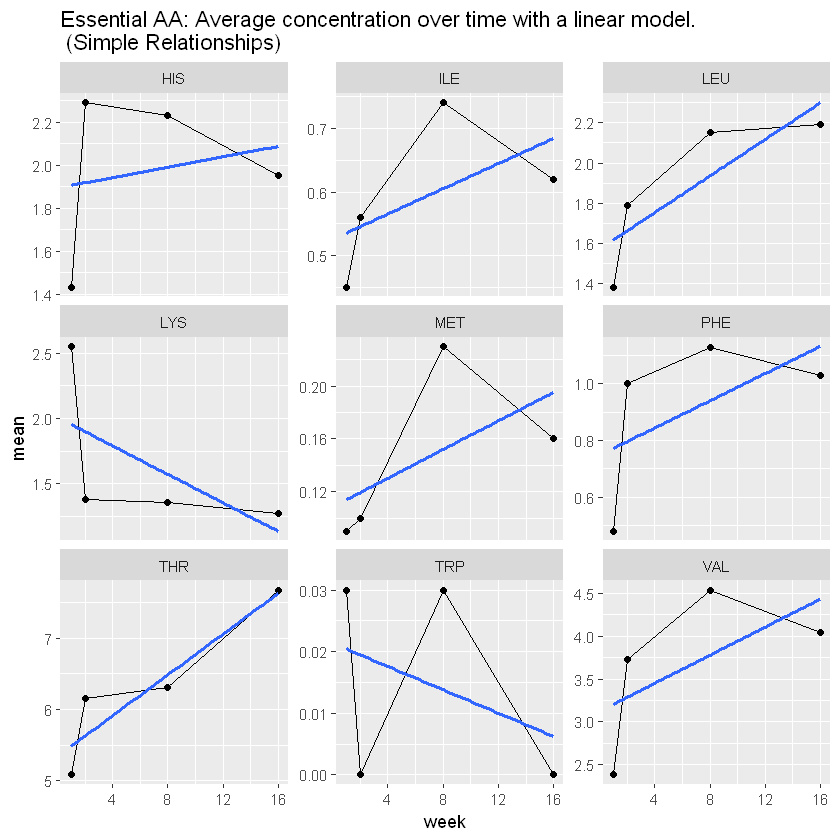

In [19]:
AA_E_mean_plot <- 
 AA_E_Long %>% group_by(week, AA) %>% 
    summarise(mean = mean(level, na.rm = T), sd = sd(level, na.rm = T)) %>% 
    mutate(mean = round(mean, 2), sd = round(sd, 2)) 

ggplot(AA_E_mean_plot, aes(x = week, y = mean)) + 
    geom_point() + geom_line() + 
    #geom_pointrange( aes(ymin = mean - sd, ymax = mean + sd)) + 
    facet_wrap(~AA,  scales = "free_y") + geom_smooth(method = lm, se = F) +
    ggtitle('Essential AA: Average concentration over time with a linear model. \n (Simple Relationships)')

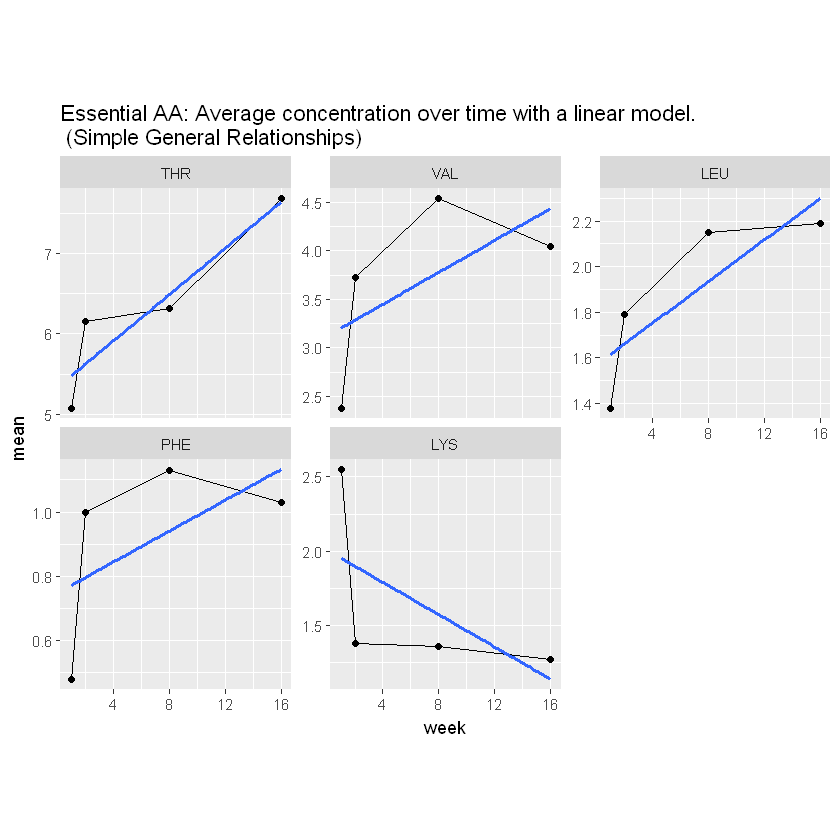

In [49]:
# THR, VAL, LEU, PHE, LYS
E_SIMPLE <- AA_E_mean_plot %>% filter(AA == 'THR' | AA == 'VAL' | AA == 'LEU' | AA == 'PHE' | AA == 'LYS') %>%
                mutate(AA = factor(AA, levels = c('THR', 'VAL', 'LEU', 'PHE', 'LYS')))

#png(filename="./plots/EAA_simple.png", units="cm", width=20, height=20, res = 300)
ggplot(E_SIMPLE, aes(x = week, y = mean)) + 
    geom_point() + geom_line() + 
    #geom_pointrange( aes(ymin = mean - sd, ymax = mean + sd)) + 
    facet_wrap(~AA,  scales = "free_y") + geom_smooth(method = lm, se = F) +
    theme(aspect.ratio = 1) +
    ggtitle('Essential AA: Average concentration over time with a linear model. \n (Simple General Relationships)')
#dev.off()

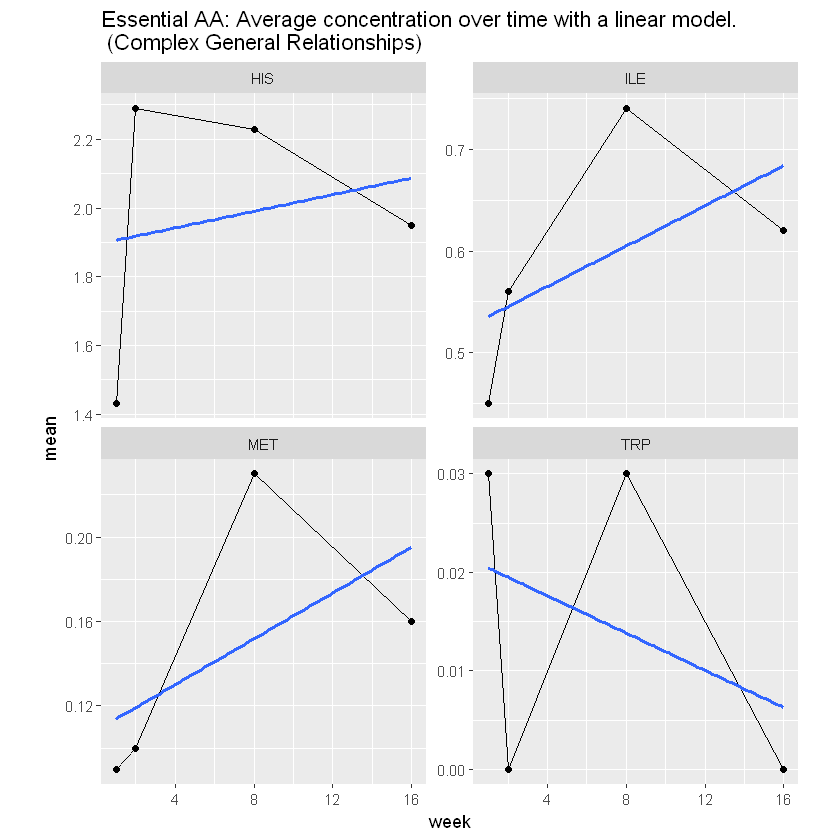

In [46]:
# HIS, 'ILE', 'MET', 'TRP'
E_COMPLEX <- AA_E_mean_plot %>% filter(AA == 'HIS' | AA == 'ILE' | AA == 'MET' | AA == 'TRP') %>%
            mutate(AA = factor(AA, levels=c('HIS', 'ILE', 'MET', 'TRP')))

#png(filename="./plots/EAA_complex.png", units="cm", width=20, height=20, res = 300)
ggplot(E_COMPLEX, aes(x = week, y = mean)) + 
    geom_point() + geom_line() + 
    #geom_pointrange( aes(ymin = mean - sd, ymax = mean + sd)) + 
    facet_wrap(~AA,  scales = "free_y") + geom_smooth(method = lm, se = F) +
    theme(aspect.ratio = 1) +
    ggtitle('Essential AA: Average concentration over time with a linear model. \n (Complex General Relationships)')
#dev.off()

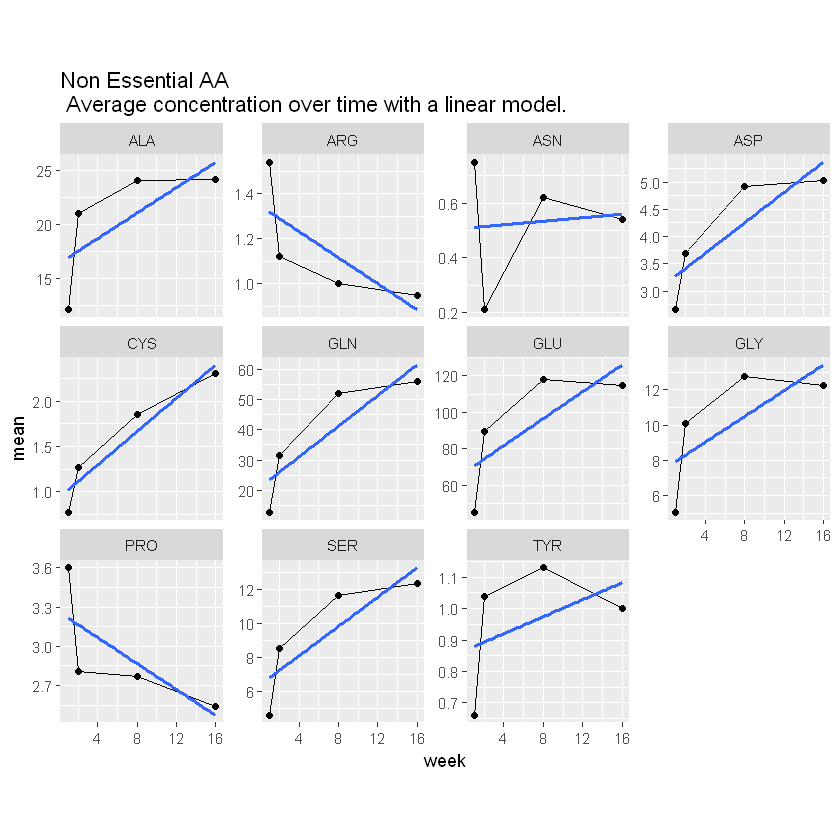

In [30]:
AA_NE_mean_plot <- 
 AA_NE_Long %>% group_by(week, AA) %>% 
    summarise(mean = mean(level, na.rm = T), sd = sd(level, na.rm = T)) %>% 
    mutate(mean = round(mean, 2), sd = round(sd, 2)) 

ggplot(AA_NE_mean_plot, aes(x = week, y = mean)) + 
    geom_point() + geom_line() +
    facet_wrap(~AA,  scales = "free_y") + geom_smooth(method = lm, se = FALSE) +
    theme(aspect.ratio = 1) + 
    ggtitle('Non Essential AA \n Average concentration over time with a linear model.')

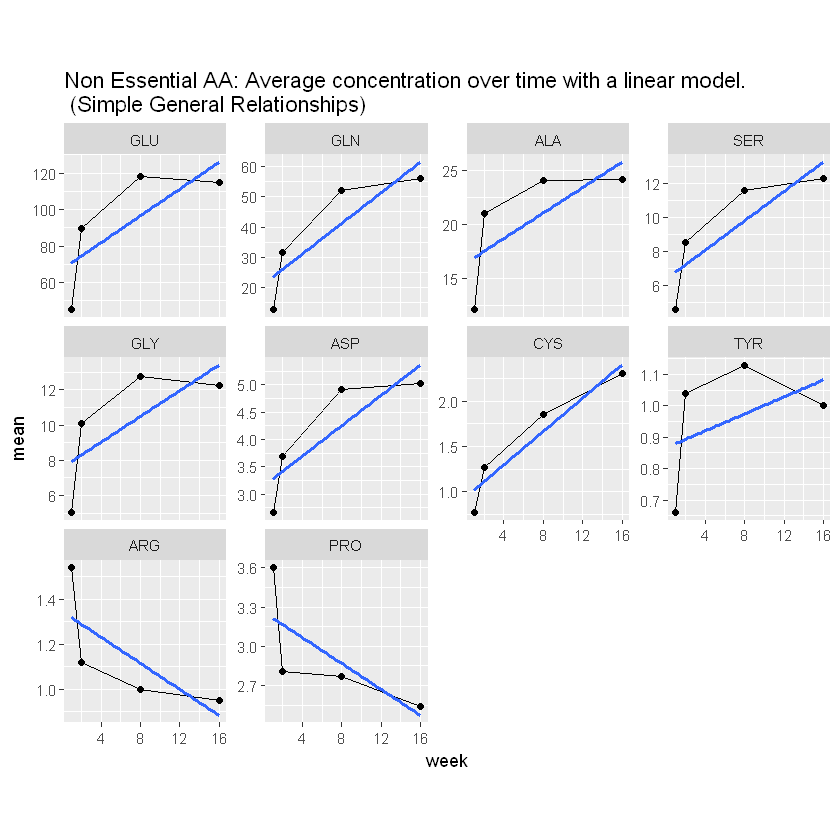

In [97]:
# GLU, GLN, ALA, SER, GLY, ASP, CYS, TYR, ARG, PRO
NE_SIMPLE <- AA_NE_mean_plot %>% 
    filter(AA == 'GLU' | AA == 'GLN' | AA == 'ALA' | AA == 'SER' | 
           AA == 'GLY' | AA == 'ASP' | AA == 'GLY' | AA == 'ASP' | 
           AA == 'CYS' | AA == 'TYR' | AA == 'ARG' | AA == 'PRO') %>% 
    mutate(AA = factor(AA, levels=c('GLU', 'GLN', 'ALA', 'SER', 'GLY', 'ASP', 'CYS', 'TYR', 'ARG', 'PRO')))
               
#png(filename="./plots/NEAA_simple.png", units="cm", width=20, height=20, res = 300)
ggplot(NE_SIMPLE, aes(x = week, y = mean)) + 
    geom_point() + geom_line() + 
    #geom_pointrange( aes(ymin = mean - sd, ymax = mean + sd)) + 
    facet_wrap(~AA,  scales = "free_y") + geom_smooth(method = lm, se = F) +
    theme(aspect.ratio = 1) +
    ggtitle('Non Essential AA: Average concentration over time with a linear model. \n (Simple General Relationships)')
#dev.off()

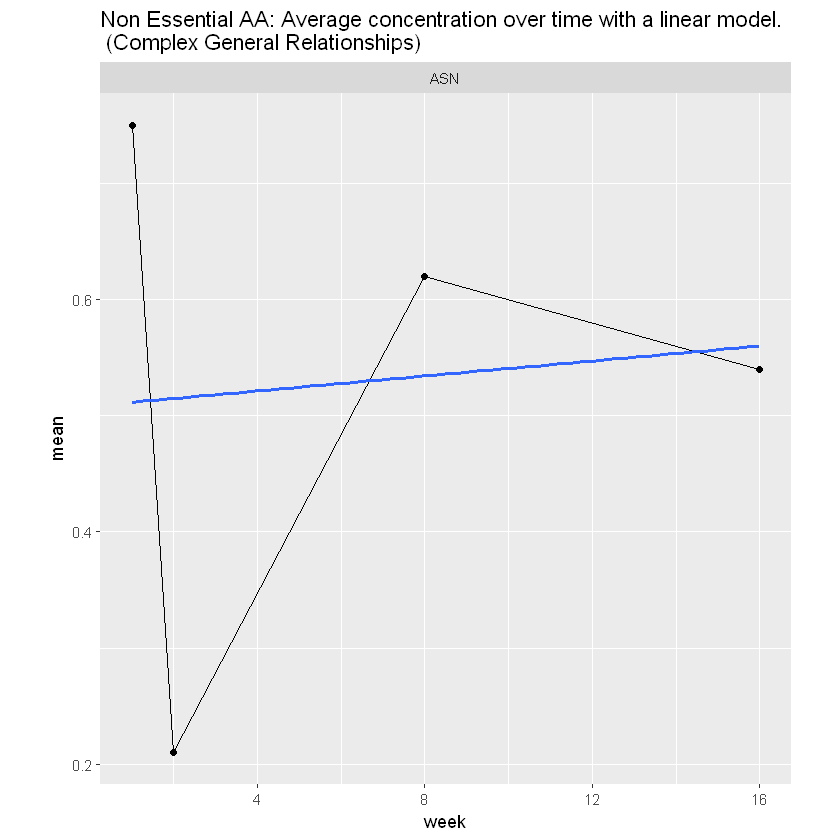

In [53]:
# ASN
NE_COMPLEX <- AA_NE_mean_plot %>% filter(AA == 'ASN')

#png(filename="./plots/NEAA_complex.png", units="cm", width=20, height=20, res = 300)
ggplot(NE_COMPLEX, aes(x = week, y = mean)) + 
    geom_point() + geom_line() + 
    #geom_pointrange( aes(ymin = mean - sd, ymax = mean + sd)) + 
    facet_wrap(~AA,  scales = "free_y") + geom_smooth(method = lm, se = F) +
    theme(aspect.ratio = 1) +
    ggtitle('Non Essential AA: Average concentration over time with a linear model. \n (Complex General Relationships)')
#dev.off()

## Sex and Free AA levels:

http://felixhaass.de/dataviz_ggplot2/session4.html


In [54]:
library(broom.mixed)


Attaching package: 'broom.mixed'

The following object is masked from 'package:broom':

    tidyMCMC



In [55]:
AA_E_Nested <- AA_E_Long %>% group_by(AA) %>% nest()
AA_NE_Nested <- AA_NE_Long %>% group_by(AA) %>% nest()

In [56]:
meSex <- function(df){
    
    me <- lmer(level ~ sex + week + (1 | id), data = df)
    
    return(me)
}

In [57]:
nAA_E <- length(AA_E_Nested$AA)
nAA_NE <- length(AA_NE_Nested$AA)

In [58]:
me_E <- list()
tidy_E <- list()

for(i in 1:nAA_E){
    
    me_E[[i]] <- meSex(AA_E_Nested$data[[i]])
    tidy_E[[i]] <- tidy(me_E[[i]], effects = 'fixed') %>% mutate(AA = AA_E_Nested$AA[i])
    
}

In [59]:
me_NE <- list()
tidy_NE <- list()

for(j in 1:nAA_NE) {
    me_NE[[j]] <- meSex(AA_NE_Nested$data[[j]])
    tidy_NE[[j]] <- tidy(me_NE[[j]], effects = 'fixed') %>% mutate(AA = AA_NE_Nested$AA[j])
}

In [60]:
AA_E_Nested <- AA_E_Nested %>% mutate(model = me_E, tidy = tidy_E)
AA_NE_Nested <- AA_NE_Nested %>% mutate(model = me_NE, tidy = tidy_NE)

In [61]:
me_E[[1]]
AA_E_Nested$tidy[[1]]

Linear mixed model fit by REML ['lmerMod']
Formula: level ~ sex + week + (1 | id)
   Data: df
REML criterion at convergence: 484.086
Random effects:
 Groups   Name        Std.Dev.
 id       (Intercept) 0.2793  
 Residual             0.8445  
Number of obs: 183, groups:  id, 61
Fixed Effects:
(Intercept)       sexboy         week  
    1.73261      0.18010      0.01551  

effect,term,estimate,std.error,statistic,AA
fixed,(Intercept),1.73260733,0.12840780,13.493007,HIS
fixed,sexboy,0.18009510,0.14783155,1.218245,HIS
fixed,week,0.01550524,0.01091728,1.420248,HIS


In [62]:
sexCoef_E <- bind_rows(tidy_E) %>% filter(grepl("sexboy", term))
sexCoef_NE <- bind_rows(tidy_NE) %>% filter(grepl("sexboy", term))

sexCoef_E
sexCoef_NE

effect,term,estimate,std.error,statistic,AA
fixed,sexboy,0.18009510,0.14783155,1.2182454,HIS
fixed,sexboy,0.08909543,0.10494380,0.8489822,ILE
fixed,sexboy,0.03872330,0.19775339,0.1958161,LEU
fixed,sexboy,0.17976559,0.21885167,0.8214038,LYS
fixed,sexboy,0.06183346,0.05528161,1.1185178,MET
fixed,sexboy,0.11793044,0.08011749,1.4719686,PHE
fixed,sexboy,-0.70135844,0.61254573,-1.1449895,THR
fixed,sexboy,-0.00338907,0.01566710,-0.2163177,TRP
fixed,sexboy,0.26116773,0.24902208,1.0487734,VAL


effect,term,estimate,std.error,statistic,AA
fixed,sexboy,0.14263751,0.1522882,0.9366285,ARG
fixed,sexboy,0.54756965,0.4801044,1.1405219,ASP
fixed,sexboy,1.61818930,1.6590414,0.9753761,ALA
fixed,sexboy,-0.08339861,0.1257038,-0.6634533,ASN
fixed,sexboy,0.35682776,0.1635167,2.1822097,CYS
fixed,sexboy,1.81908239,0.7897730,2.3032979,GLY
fixed,sexboy,14.39755181,6.5220682,2.2075132,GLU
fixed,sexboy,3.06094539,3.3877643,0.9035296,GLN
fixed,sexboy,0.38692513,0.3436295,1.1259951,PRO
fixed,sexboy,1.22571449,0.6975134,1.7572631,SER


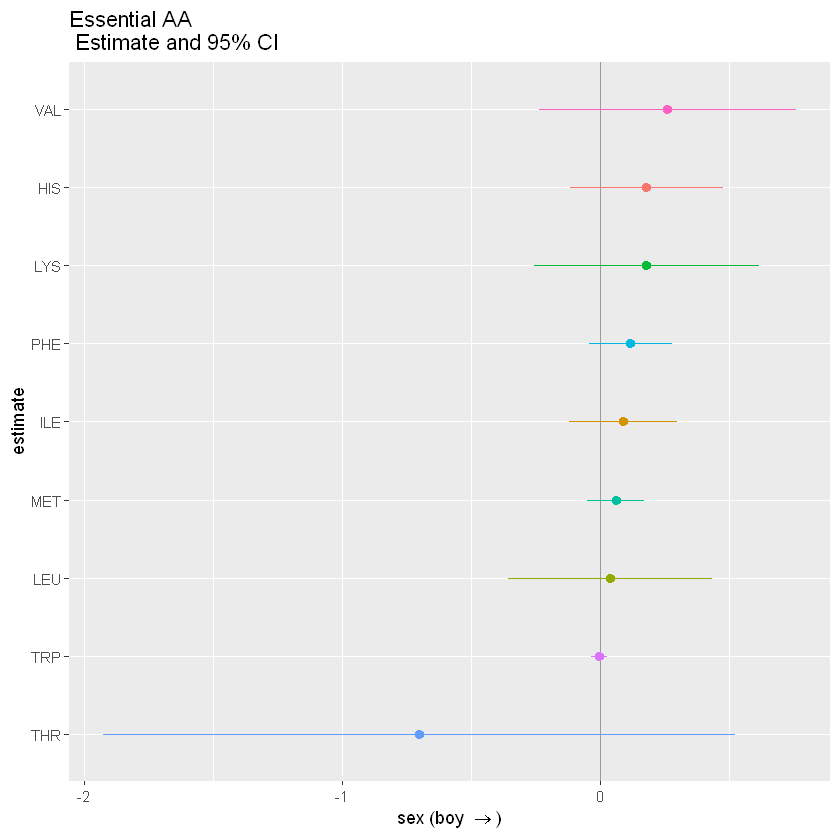

In [63]:
#png(filename="./plots/EAA_coeff.png", units="cm", width=20, height=20, res = 300)
ggplot(sexCoef_E, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") + 
    coord_flip() + 
    ggtitle('Essential AA \n Estimate and 95% CI') + xlab('estimate') + ylab(TeX('sex (boy $\\rightarrow$)'))   
#dev.off()

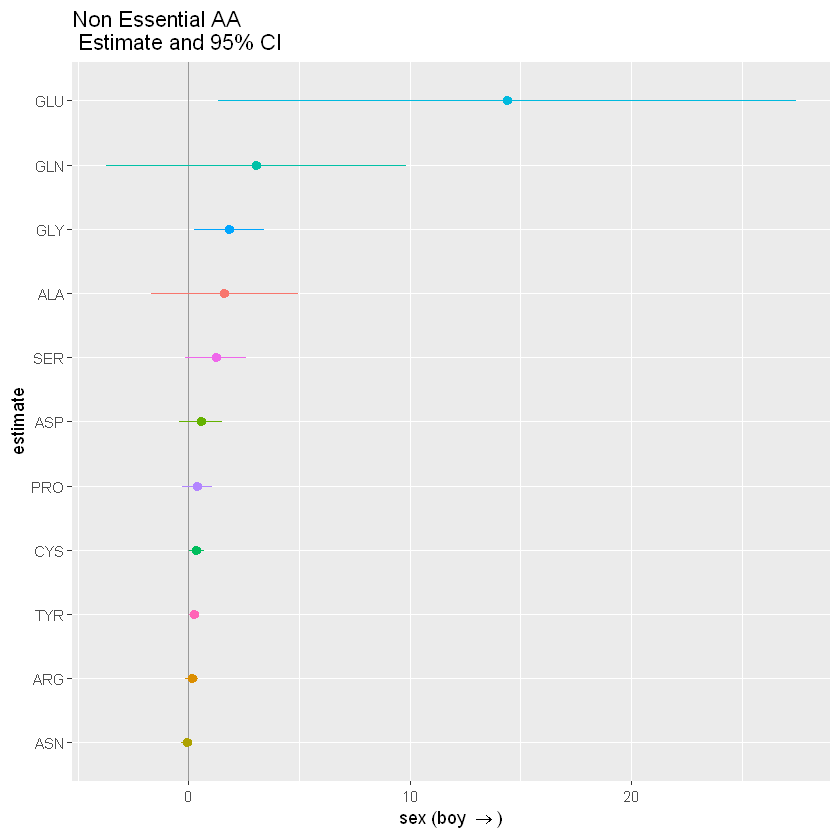

In [66]:
#png(filename="./plots/NEAA_coeff.png", units="cm", width=20, height=20, res = 300)
ggplot(sexCoef_NE, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") +
    coord_flip() +
    ggtitle('Non Essential AA \n Estimate and 95% CI') +  xlab('estimate') + ylab(TeX('sex (boy $\\rightarrow$)')) 
#dev.off()

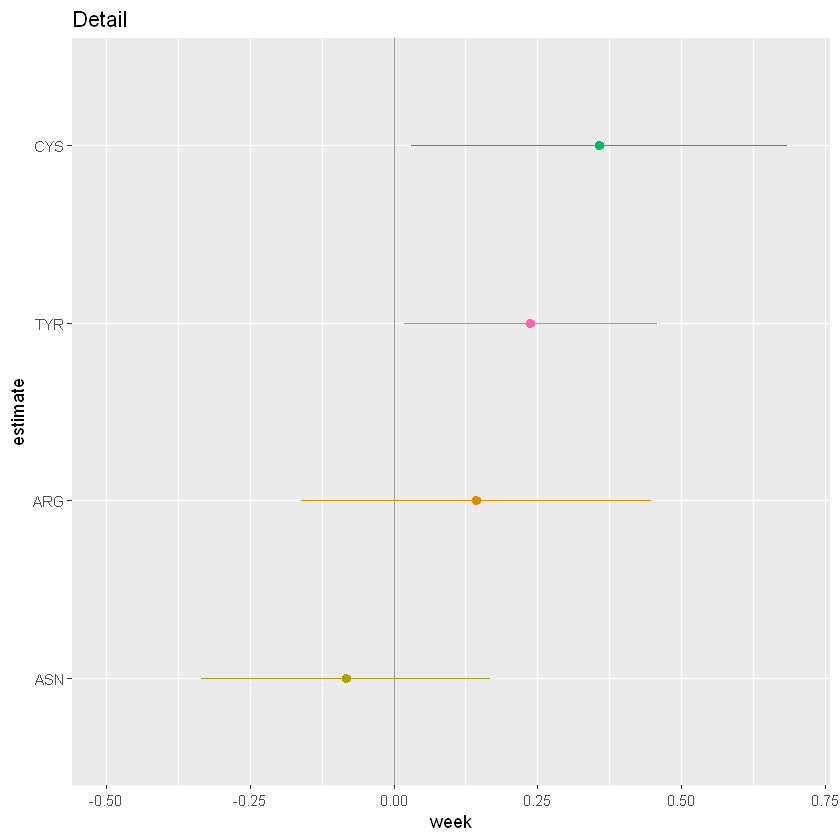

In [94]:
#png(filename="./plots/NEAA_coeff_detail.png", units="cm", width=20, height=20, res = 300)
ggplot(sexCoef_NE, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") + 
    coord_flip(ylim = c(-0.5, 0.7), xlim = c(1, 4)) +  
    ggtitle('Detail') + xlab('estimate') + ylab('week') 
#dev.off()


In [69]:
AA_NE_Long %>% group_by(id) %>% summarise(TAA = mean(level, na.rm = T)) %>% head()

id,TAA
1,14.477273
2,17.409091
3,16.045455
4,5.818182
5,4.000000
6,13.909091


In [70]:
weekCoef_E <- bind_rows(tidy_E) %>% filter(grepl("week", term))
weekCoef_NE <- bind_rows(tidy_NE) %>% filter(grepl("week", term))

weekCoef_E
weekCoef_NE

effect,term,estimate,std.error,statistic,AA
fixed,week,0.0155052407,0.010917280,1.4202476,HIS
fixed,week,0.0133510720,0.006676275,1.9997787,ILE
fixed,week,0.0497045238,0.016096309,3.0879454,LEU
fixed,week,-0.0537753068,0.016430839,-3.2728278,LYS
fixed,week,0.0065908320,0.004543971,1.4504566,MET
fixed,week,0.0272732201,0.006733247,4.0505300,PHE
fixed,week,0.1310249700,0.031598543,4.1465511,THR
fixed,week,-0.0004120271,0.001340103,-0.3074593,TRP
fixed,week,0.0943042848,0.017936935,5.2575473,VAL


effect,term,estimate,std.error,statistic,AA
fixed,week,-0.0256058452,0.010165582,-2.51887658,ARG
fixed,week,0.1506534181,0.031530444,4.77803029,ASP
fixed,week,0.6432946534,0.109616643,5.86858561,ALA
fixed,week,-0.0007231668,0.010046321,-0.07198324,ASN
fixed,week,0.0954215677,0.010469964,9.11383894,CYS
fixed,week,0.4108440229,0.053088741,7.73881653,GLY
fixed,week,4.0793697194,0.452598363,9.01322243,GLU
fixed,week,2.6781209810,0.224747115,11.91615285,GLN
fixed,week,-0.0536342174,0.023582439,-2.27432871,PRO
fixed,week,0.4607940237,0.045398815,10.14991297,SER


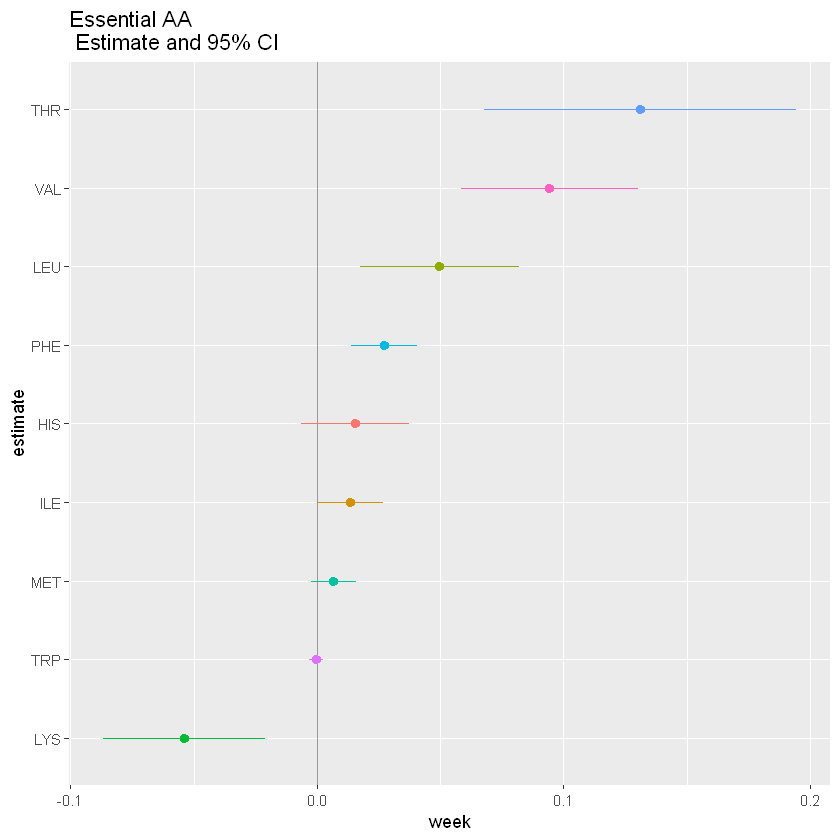

In [71]:
#png(filename="./plots/EAA_week_coeff.png", units="cm", width=20, height=20, res = 300)
ggplot(weekCoef_E, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") +
    coord_flip() +
    ggtitle('Essential AA \n Estimate and 95% CI') +  xlab('estimate') + ylab('week') 
#dev.off()

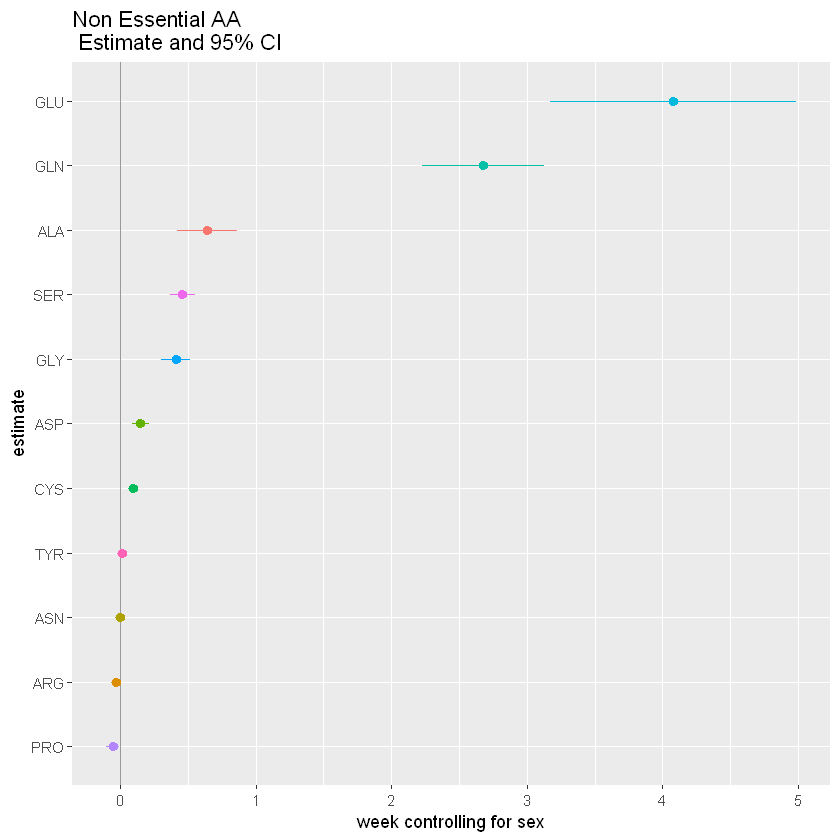

In [74]:
#png(filename="./plots/NEAA_week_coeff.png", units="cm", width=20, height=20, res = 300)
ggplot(weekCoef_NE, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") +
    coord_flip() +
    ggtitle('Non Essential AA \n Estimate and 95% CI') +  xlab('estimate') + ylab('week controlling for sex') 
#dev.off()

## Group and Free AA levels

$AA = \alpha_0 + \alpha_1 \ group + \alpha_2 \ sex + \alpha_3 \ week + \alpha_{id}$

In [119]:
meGroup <- function(df){
    
    me <- lmer(level ~ sex + group + week + (1 | id), data = df)
    
    return(me)
}

In [120]:
me_E_G <- list()
tidy_E_G <- list()

for(i in 1:nAA_E){
    
    me_E_G[[i]] <- meGroup(AA_E_Nested$data[[i]])
    tidy_E_G[[i]] <- tidy(me_E_G[[i]], effects = 'fixed') %>% mutate(AA = AA_E_Nested$AA[i])
    
}

In [121]:
me_NE_G <- list()
tidy_NE_G <- list()

for(i in 1:nAA_NE){
    
    me_NE_G[[i]] <- meGroup(AA_NE_Nested$data[[i]])
    tidy_NE_G[[i]] <- tidy(me_NE_G[[i]], effects = 'fixed') %>% mutate(AA = AA_NE_Nested$AA[i])

}

In [122]:
AA_E_Nested <- AA_E_Nested %>% mutate(model_G = me_E_G, tidy_G = tidy_E_G)
AA_NE_Nested <- AA_NE_Nested %>% mutate(model_G = me_NE_G, tidy_G = tidy_NE_G)

In [123]:
me_E_G[1]
AA_E_Nested$tidy_G[[1]]
AA_E_Nested$tidy[[1]]

[[1]]
Linear mixed model fit by REML ['lmerMod']
Formula: level ~ sex + group + week + (1 | id)
   Data: df
REML criterion at convergence: 485.7638
Random effects:
 Groups   Name        Std.Dev.
 id       (Intercept) 0.2849  
 Residual             0.8451  
Number of obs: 183, groups:  id, 61
Fixed Effects:
(Intercept)       sexboy   groupadult         week  
    1.69466      0.19741      0.07302      0.01516  


effect,term,estimate,std.error,statistic,AA
fixed,(Intercept),1.69465972,0.15172437,11.1693307,HIS
fixed,sexboy,0.19741206,0.15314414,1.2890605,HIS
fixed,groupadult,0.07302050,0.15447799,0.4726919,HIS
fixed,week,0.01515671,0.01095015,1.3841560,HIS


effect,term,estimate,std.error,statistic,AA
fixed,(Intercept),1.73260733,0.12840780,13.493007,HIS
fixed,sexboy,0.18009510,0.14783155,1.218245,HIS
fixed,week,0.01550524,0.01091728,1.420248,HIS


In [124]:
sexCoef_E_G <- bind_rows(tidy_E_G) %>% filter(grepl("sexboy", term))
sexCoef_NE_G <- bind_rows(tidy_NE_G) %>% filter(grepl("sexboy", term))

groupCoef_E_G <- bind_rows(tidy_E_G) %>% filter(grepl("groupadult", term))
groupCoef_NE_G <- bind_rows(tidy_NE_G) %>% filter(grepl("groupadult", term))

sexCoef_NE_G
groupCoef_E_G
groupCoef_NE_G

effect,term,estimate,std.error,statistic,AA
fixed,sexboy,0.13119286,0.1580725,0.8299535,ARG
fixed,sexboy,0.47781369,0.4972377,0.9609363,ASP
fixed,sexboy,1.82605942,1.7129060,1.0660594,ALA
fixed,sexboy,-0.04476726,0.1290421,-0.3469199,ASN
fixed,sexboy,0.32271226,0.1688611,1.9111112,CYS
fixed,sexboy,1.80891292,0.8199613,2.2060955,GLY
fixed,sexboy,13.19308351,6.7666051,1.9497345,GLU
fixed,sexboy,4.85963020,3.3327430,1.4581473,GLN
fixed,sexboy,0.34748015,0.3551629,0.9783683,PRO
fixed,sexboy,1.48581776,0.7025900,2.1147721,SER


effect,term,estimate,std.error,statistic,AA
fixed,groupadult,0.073020496,0.15447799,0.4726919,HIS
fixed,groupadult,-0.083155492,0.10912814,-0.7619986,ILE
fixed,groupadult,0.074785724,0.20732122,0.3607239,LEU
fixed,groupadult,0.084027004,0.22950020,0.3661304,LYS
fixed,groupadult,0.029426189,0.05794487,0.5078308,MET
fixed,groupadult,0.028960713,0.08380161,0.3455866,PHE
fixed,groupadult,0.917370138,0.62730367,1.4624020,THR
fixed,groupadult,0.003820134,0.01636325,0.2334581,TRP
fixed,groupadult,0.060417454,0.26093030,0.2315463,VAL


effect,term,estimate,std.error,statistic,AA
fixed,groupadult,-0.05459405,0.1595268,-0.34222494,ARG
fixed,groupadult,-0.30670596,0.5018444,-0.61115746,ASP
fixed,groupadult,0.89361966,1.7286932,0.51693364,ALA
fixed,groupadult,0.16081508,0.1301098,1.23599534,ASN
fixed,groupadult,-0.14744090,0.1704427,-0.86504663,CYS
fixed,groupadult,-0.04948849,0.8274783,-0.05980639,GLY
fixed,groupadult,-5.24953592,6.8276765,-0.76886126,GLU
fixed,groupadult,7.73109968,3.3626699,2.29909566,GLN
fixed,groupadult,-0.17061851,0.3583763,-0.47608764,PRO
fixed,groupadult,1.12675255,0.7090336,1.58913852,SER


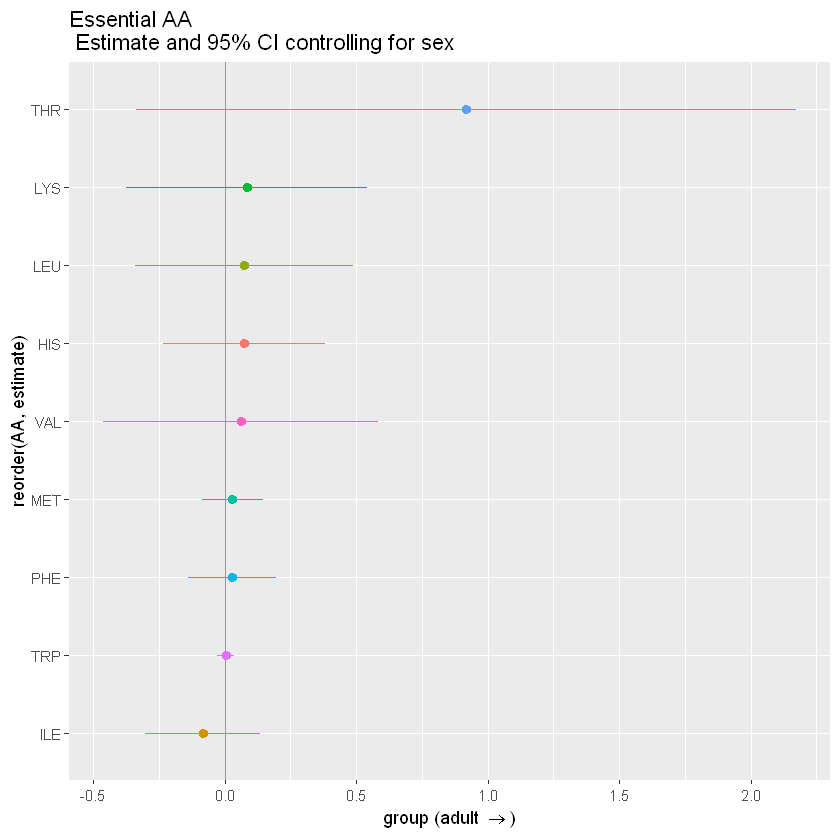

In [125]:
#png(filename="./plots/EAA_G_given_S_coeff.png", units="cm", width=20, height=20, res = 300)
ggplot(groupCoef_E_G, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") + 
    coord_flip() + 
    ggtitle('Essential AA \n Estimate and 95% CI controlling for sex') + ylab(TeX('group (adult $\\rightarrow$)')) 
#dev.off()

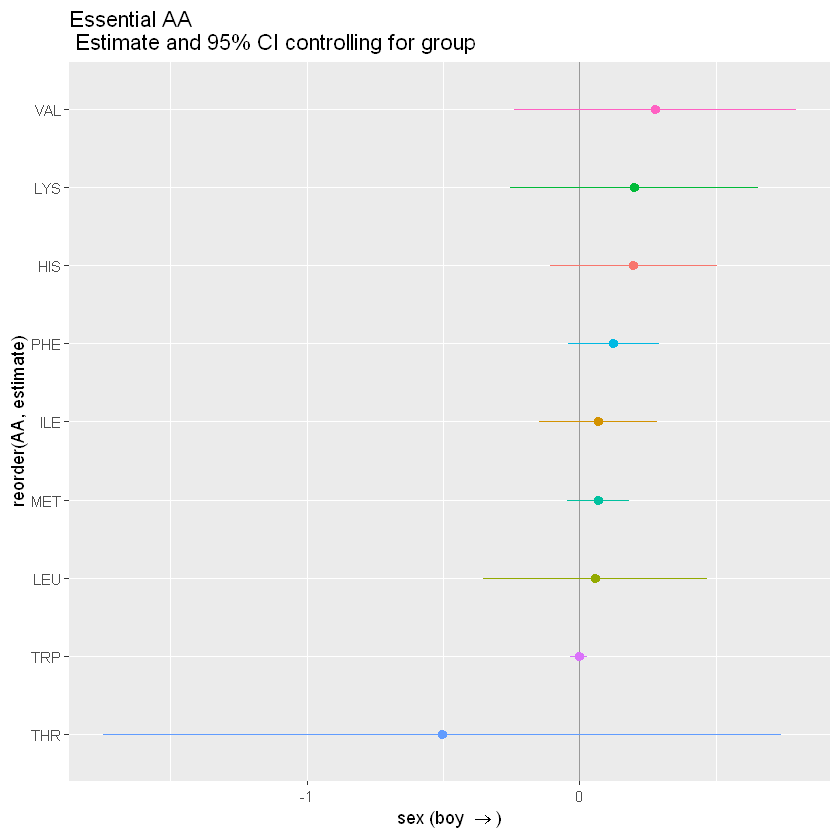

In [126]:
#png(filename="./plots/EAA_S_given_G_coeff.png", units="cm", width=20, height=20, res = 300)
ggplot(sexCoef_E_G, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") + 
    coord_flip() + 
    ggtitle('Essential AA \n Estimate and 95% CI controlling for group') + ylab(TeX('sex (boy $\\rightarrow$)'))
#dev.off()

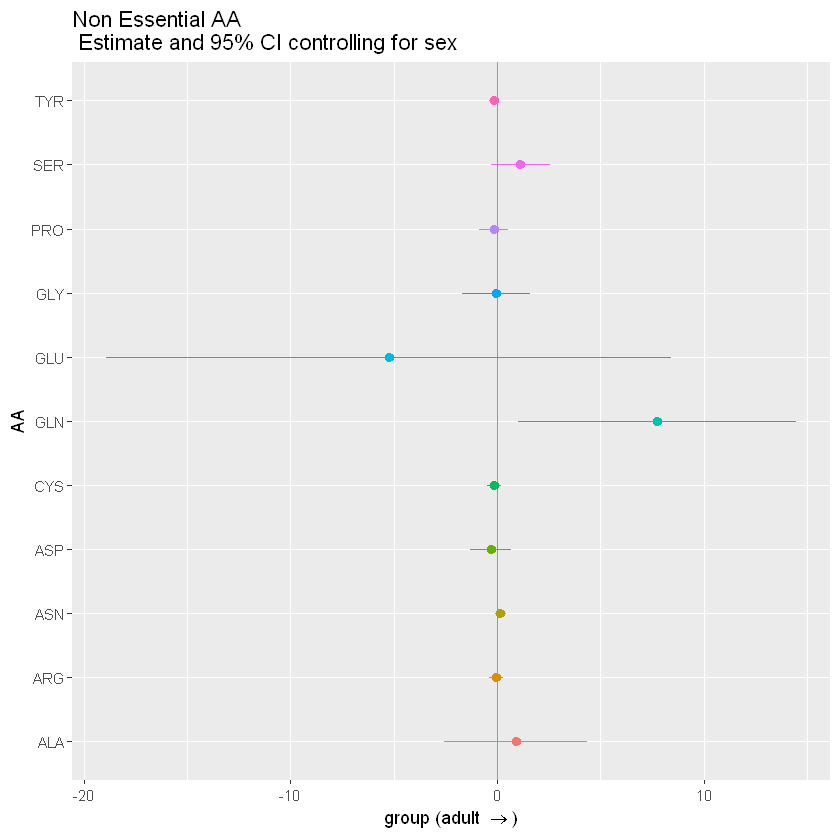

In [127]:
#png(filename="./plots/NEAA_G_given_S_coeff.png", units="cm", width=20, height=20, res = 300)
ggplot(groupCoef_NE_G, aes(x = AA, y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") +
    coord_flip() + ylab(TeX('group (adult $\\rightarrow$)')) + 
    ggtitle('Non Essential AA \n Estimate and 95% CI controlling for sex')
#dev.off()

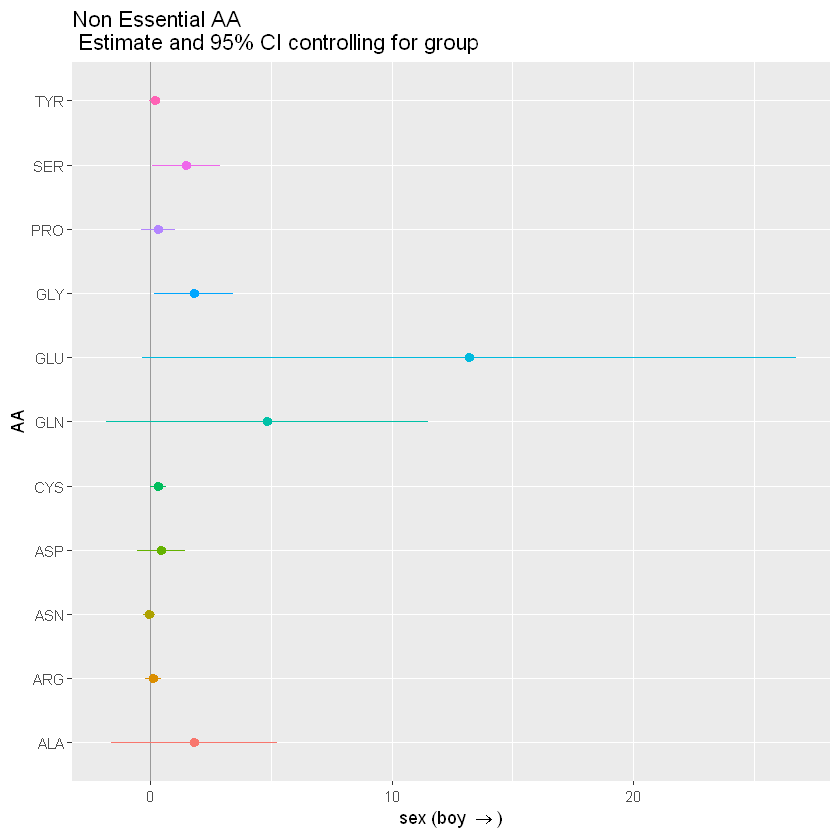

In [128]:
#png(filename="./plots/NEAA_S_given_G_coeff.png", units="cm", width=20, height=20, res = 300)
ggplot(sexCoef_NE_G, aes(x = AA, y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") +
    coord_flip() + ylab(TeX('sex (boy $\\rightarrow$)')) + 
    ggtitle('Non Essential AA \n Estimate and 95% CI controlling for group')
#dev.off()

In [129]:
AA_E %>% group_by(sex, group) %>% summarise(n())

sex,group,n()
girl,teen,13
girl,adult,13
boy,teen,24
boy,adult,11
NA,teen,2
NA,adult,2


## Sex-Week interaction and Free AA

$$
\begin{align*}
AA &= \alpha_0 + \alpha_1 \ sex + \alpha_2 \ week + \alpha_3 \ sex \times week + \alpha_{id} \\
   &= \alpha_0 + \alpha_1 \ sex + \left( \alpha_2 + \alpha_3 \ sex \right) \times week + \alpha_{id} \\
   &= \alpha_0 + \left( \alpha_1 + \alpha_3 \ week \right) \times \ sex +  \alpha_2 \ week + \alpha_{id}
\end{align*}
$$

In [98]:
meSexWeek <- function(df){
    
    me <- lmer(level ~ sex + week + sex:week + (1 | id), data = df)
    
    return(me)
}

In [99]:
me_E_SW <- list()
tidy_E_SW <- list()

for(i in 1:nAA_E){
    
    me_E_SW[[i]] <- meSexWeek(AA_E_Nested$data[[i]])
    covMat_E <- vcov(me_E_SW[[i]])
    tidy_E_SW[[i]] <- tidy(me_E_SW[[i]], effects = 'fixed') %>% 
        mutate(AA = AA_E_Nested$AA[i], var_W = covMat_E[3, 3], var_SW = covMat_E[4, 4], cov_SW = covMat_E[3, 4])
   
}

In [100]:
me_NE_SW <- list()
tidy_NE_SW <- list()

for(i in 1:nAA_NE){
    
    me_NE_SW[[i]] <- meSexWeek(AA_NE_Nested$data[[i]])
    covMat_NE <- vcov(me_NE_SW[[i]])
    tidy_NE_SW[[i]] <- tidy(me_NE_SW[[i]], effects = 'fixed') %>% 
        mutate(AA = AA_NE_Nested$AA[i], var_W = covMat_NE[3, 3], var_SW = covMat_NE[4, 4], cov_SW = covMat_NE[3, 4])

}

In [101]:
vcov(me_E_SW[[1]])

4 x 4 Matrix of class "dpoMatrix"
             (Intercept)       sexboy          week   sexboy:week
(Intercept)  0.021393448 -0.021393448 -0.0015330822  0.0015330822
sexboy      -0.021393448  0.037314739  0.0015330822 -0.0027327055
week        -0.001533082  0.001533082  0.0002670664 -0.0002670664
sexboy:week  0.001533082 -0.002732705 -0.0002670664  0.0004846457

In [102]:
AA_E_Nested <- AA_E_Nested %>% mutate(model_SW = me_E_SW, tidy_SW = tidy_E_SW)
AA_NE_Nested <- AA_NE_Nested %>% mutate(model_SW = me_NE_SW, tidy_SW = tidy_NE_SW)

In [103]:
AA_E_Nested$model_SW[1]
AA_E_Nested$tidy_SW[1]

[[1]]
Linear mixed model fit by REML ['lmerMod']
Formula: level ~ sex + week + sex:week + (1 | id)
   Data: df
REML criterion at convergence: 489.7939
Random effects:
 Groups   Name        Std.Dev.
 id       (Intercept) 0.2782  
 Residual             0.8472  
Number of obs: 183, groups:  id, 61
Fixed Effects:
(Intercept)       sexboy         week  sexboy:week  
   1.753438     0.143093     0.011896     0.006564  


effect,term,estimate,std.error,statistic,AA,var_W,var_SW,cov_SW
fixed,(Intercept),1.753438036,0.14626499,11.9880910,HIS,0.0002670664,0.0004846457,-0.0002670664
fixed,sexboy,0.143092607,0.19317023,0.7407591,HIS,0.0002670664,0.0004846457,-0.0002670664
fixed,week,0.011896119,0.01634217,0.7279401,HIS,0.0002670664,0.0004846457,-0.0002670664
fixed,sexboy:week,0.006563508,0.02201467,0.2981424,HIS,0.0002670664,0.0004846457,-0.0002670664


In [104]:
df1_E <- bind_rows(tidy_E_SW) %>% filter(grepl("^week$", term))
df2_E <- bind_rows(tidy_E_SW) %>% filter(grepl("^sexboy:week$", term))

left_join(df1_E, df2_E, by = c('AA', 'effect'))

effect,term.x,estimate.x,std.error.x,statistic.x,AA,var_W.x,var_SW.x,cov_SW.x,term.y,estimate.y,std.error.y,statistic.y,var_W.y,var_SW.y,cov_SW.y
fixed,week,0.0118961190,0.016342167,0.7279401,HIS,2.670664e-04,4.846457e-04,-2.670664e-04,sexboy:week,0.006563508,0.022014670,0.29814245,2.670664e-04,4.846457e-04,-2.670664e-04
fixed,week,0.0218973491,0.009945470,2.2017409,ILE,9.891238e-05,1.802144e-04,-9.891238e-05,sexboy:week,-0.015593924,0.013424397,-1.16161073,9.891238e-05,1.802144e-04,-9.891238e-05
fixed,week,0.0506114225,0.024153214,2.0954322,LEU,5.833777e-04,1.055268e-03,-5.833777e-04,sexboy:week,-0.001675822,0.032484883,-0.05158774,5.833777e-04,1.055268e-03,-5.833777e-04
fixed,week,-0.0313407448,0.024544818,-1.2768783,LYS,6.024481e-04,1.092492e-03,-6.024481e-04,sexboy:week,-0.040869984,0.033052873,-1.23650322,6.024481e-04,1.092492e-03,-6.024481e-04
fixed,week,0.0073141172,0.006819872,1.0724713,MET,4.651066e-05,8.410353e-05,-4.651066e-05,sexboy:week,-0.001314011,0.009170797,-0.14328206,4.651066e-05,8.410353e-05,-4.651066e-05
fixed,week,0.0310360166,0.010139772,3.0608199,PHE,1.028150e-04,1.849940e-04,-1.028150e-04,sexboy:week,-0.006803457,0.013601251,-0.50020817,1.028150e-04,1.849940e-04,-1.028150e-04
fixed,week,0.1512440782,0.047073073,3.2129638,THR,2.215874e-03,4.054511e-03,-2.215874e-03,sexboy:week,-0.036877869,0.063675043,-0.57915735,2.215874e-03,4.054511e-03,-2.215874e-03
fixed,week,0.0007799286,0.002008098,0.3883916,TRP,4.032459e-06,7.282184e-06,-4.032459e-06,sexboy:week,-0.002152543,0.002698552,-0.79766576,4.032459e-06,7.282184e-06,-4.032459e-06
fixed,week,0.1026163853,0.026850696,3.8217402,VAL,7.209599e-04,1.309204e-03,-7.209599e-04,sexboy:week,-0.015064571,0.036182930,-0.41634468,7.209599e-04,1.309204e-03,-7.209599e-04


In [105]:
df1_E <- bind_rows(tidy_E_SW) %>% filter(grepl("^week$", term))
df2_E <- bind_rows(tidy_E_SW) %>% filter(grepl("^sexboy:week$", term))

sexCoef_E_SW <- left_join(df1_E, df2_E, by = c('AA', 'effect')) %>% 
            mutate(estimate_girl = estimate.x,
                   estimate_boy = estimate.x + estimate.y, 
                   std.error_boy = sqrt(var_W.x + var_SW.x + 2*cov_SW.x)) %>% 
            select(effect, AA, estimate_boy, std.error_boy, estimate_girl)

sexCoef_E_SW

effect,AA,estimate_boy,std.error_boy,estimate_girl
fixed,HIS,0.018459627,0.014750568,0.0118961190
fixed,ILE,0.006303426,0.009016765,0.0218973491
fixed,LEU,0.048935601,0.021723027,0.0506114225
fixed,LYS,-0.072210729,0.022136944,-0.0313407448
fixed,MET,0.006000106,0.006131302,0.0073141172
fixed,PHE,0.024232560,0.009065265,0.0310360166
fixed,THR,0.114366210,0.042879329,0.1512440782
fixed,TRP,-0.001372614,0.001802699,0.0007799286
fixed,VAL,0.087551815,0.024253754,0.1026163853


In [106]:
df1_NE <- bind_rows(tidy_NE_SW) %>% filter(grepl("^week$", term))
df2_NE <- bind_rows(tidy_NE_SW) %>% filter(grepl("^sexboy:week$", term))

sexCoef_NE_SW <- left_join(df1_NE, df2_NE, by = c('AA', 'effect')) %>% 
            mutate(estimate_girl = estimate.x,
                   estimate_boy = estimate.x + estimate.y, 
                   std.error_boy = sqrt(var_W.x + var_SW.x + 2*cov_SW.x)) %>% 
            select(effect, AA, estimate_boy, std.error_boy, estimate_girl)

sexCoef_NE_SW

effect,AA,estimate_boy,std.error_boy,estimate_girl
fixed,ARG,-0.039514820,0.013713784,-0.008931382
fixed,ASP,0.191335633,0.042293959,0.101209065
fixed,ALA,0.785458521,0.146877072,0.470434199
fixed,ASN,0.003399247,0.013547176,-0.005808696
fixed,CYS,0.107833530,0.014081245,0.080326062
fixed,GLY,0.428403222,0.071777214,0.389428512
fixed,GLU,4.392748009,0.610486601,3.696369483
fixed,GLN,2.778492223,0.303949898,2.555991339
fixed,PRO,-0.069070724,0.031874819,-0.034913860
fixed,SER,0.483329438,0.061391981,0.433364878


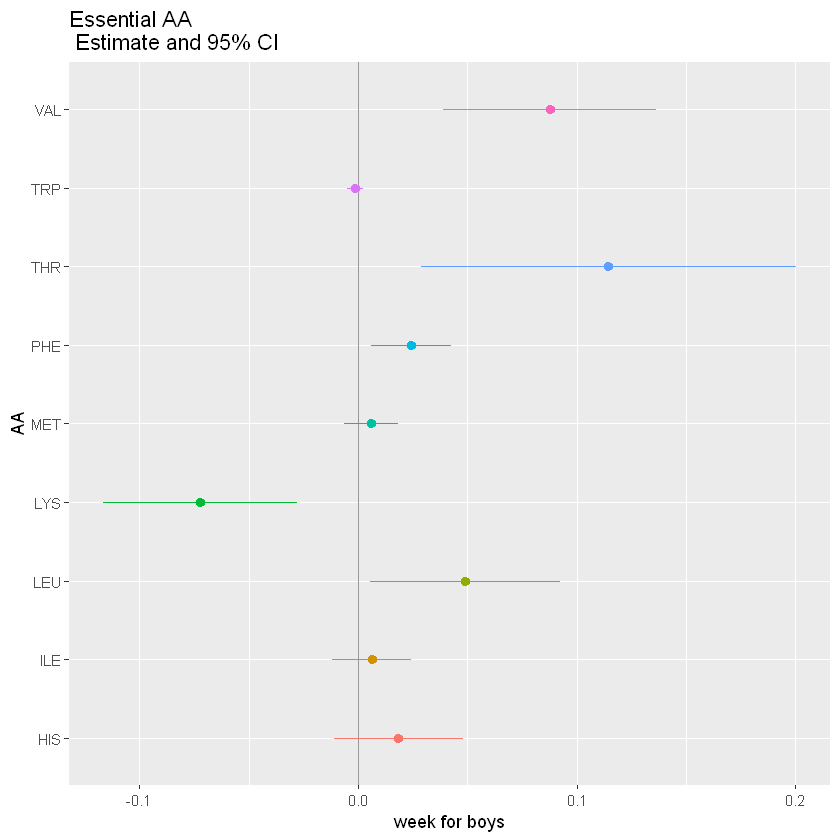

In [107]:
#png(filename="./plots/EAA_SW_coeff.png", units="cm", width=20, height=20, res = 300)
ggplot(sexCoef_E_SW, aes(x = AA, y = estimate_boy, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate_boy - 2*std.error_boy, ymax = estimate_boy + 2*std.error_boy)) + 
    theme(legend.position = "none") + 
    coord_flip() + ylab('week for boys') + 
    ggtitle('Essential AA \n Estimate and 95% CI') 
#dev.off()

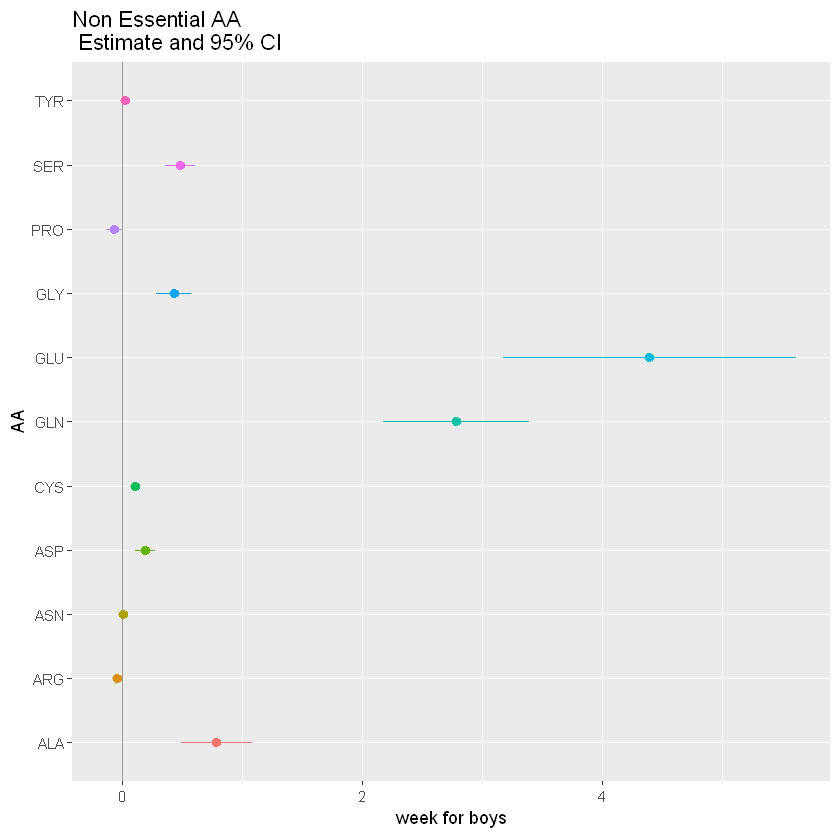

In [108]:
#png(filename="./plots/NEAA_SW_coeff.png", units="cm", width=20, height=20, res = 300)
ggplot(sexCoef_NE_SW, aes(x = AA, y = estimate_boy, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate_boy - 2*std.error_boy, ymax = estimate_boy + 2*std.error_boy)) + 
    theme(legend.position = "none") + 
    coord_flip() + ylab(TeX('week for boys')) + 
    ggtitle('Non Essential AA \n Estimate and 95% CI') 
#dev.off()

In [109]:
a_0_E <- bind_rows(tidy_E_SW) %>% filter(grepl("(Intercept)", term)) %>% 
                select(AA, estimate.a_0 = estimate, std.error.a_0 = std.error)
a_0_NE <- bind_rows(tidy_NE_SW) %>% filter(grepl("(Intercept)", term)) %>% 
                select(AA, estimate.a_0 = estimate, std.error.a_0 = std.error)

a_0_E 
a_0_NE 

AA,estimate.a_0,std.error.a_0
HIS,1.753438036,0.14626499
ILE,0.394481886,0.09688867
LEU,1.506555131,0.20567606
LYS,1.784889567,0.21704767
MET,0.058953707,0.05780137
PHE,0.620540958,0.08537866
THR,5.663313420,0.53009813
TRP,0.008240932,0.01673621
VAL,2.754038339,0.24325533


AA,estimate.a_0,std.error.a_0
ARG,1.1653868,0.1426091
ASP,2.9765403,0.4508441
ALA,15.6299040,1.5637160
ASN,0.6299832,0.1294563
CYS,0.7681782,0.1518533
GLY,6.0628496,0.7496030
GLU,55.8558794,6.2725985
GLN,17.8043882,3.1952381
PRO,3.0321843,0.3282142
SER,5.4152040,0.6528930


In [110]:
ablines_E_SW <- left_join(sexCoef_E_SW, a_0_E, by = 'AA') %>% select(AA, estimate_boy, estimate_girl, estimate.a_0)
ablines_NE_SW <- left_join(sexCoef_NE_SW, a_0_NE, by = 'AA') %>% select(AA, estimate_boy, estimate_girl, estimate.a_0)

ablines_E_SW <- ablines_E_SW %>% gather(sex, estimate, 2:3)
ablines_NE_SW <- ablines_NE_SW %>% gather(sex, estimate, 2:3)

ablines_E_SW
ablines_NE_SW

AA,estimate.a_0,sex,estimate
HIS,1.753438036,estimate_boy,0.0184596266
ILE,0.394481886,estimate_boy,0.0063034255
LEU,1.506555131,estimate_boy,0.0489356008
LYS,1.784889567,estimate_boy,-0.0722107285
MET,0.058953707,estimate_boy,0.0060001065
PHE,0.620540958,estimate_boy,0.0242325599
THR,5.663313420,estimate_boy,0.1143662095
TRP,0.008240932,estimate_boy,-0.0013726141
VAL,2.754038339,estimate_boy,0.0875518147
HIS,1.753438036,estimate_girl,0.0118961190


AA,estimate.a_0,sex,estimate
ARG,1.1653868,estimate_boy,-0.039514820
ASP,2.9765403,estimate_boy,0.191335633
ALA,15.6299040,estimate_boy,0.785458521
ASN,0.6299832,estimate_boy,0.003399247
CYS,0.7681782,estimate_boy,0.107833530
GLY,6.0628496,estimate_boy,0.428403222
GLU,55.8558794,estimate_boy,4.392748009
GLN,17.8043882,estimate_boy,2.778492223
PRO,3.0321843,estimate_boy,-0.069070724
SER,5.4152040,estimate_boy,0.483329438


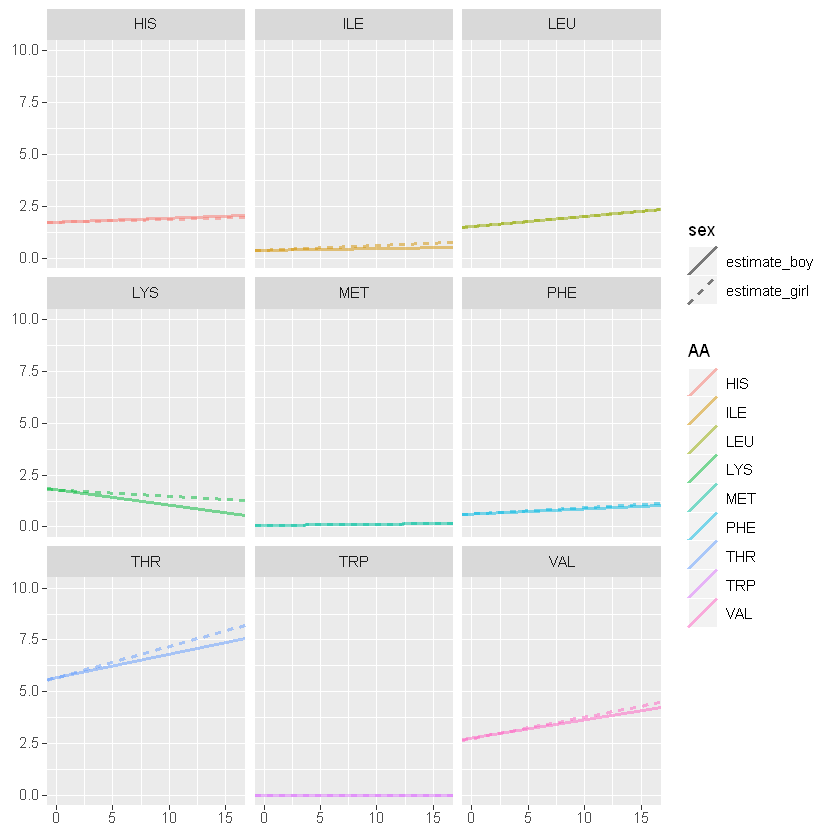

In [111]:
#png(filename="./plots/E_SW_trends.png", units="cm", width=20, height=20, res = 300)
ggplot() + 
    scale_x_continuous(limits=c(0, 16)) +
    scale_y_continuous(limits=c(0, 10)) + 
    geom_abline(data=ablines_E_SW, size = 1.1, alpha = 0.5,
                aes(slope = estimate, intercept = estimate.a_0, color = AA, linetype=sex)) + 
    facet_wrap(~AA)

#dev.off()

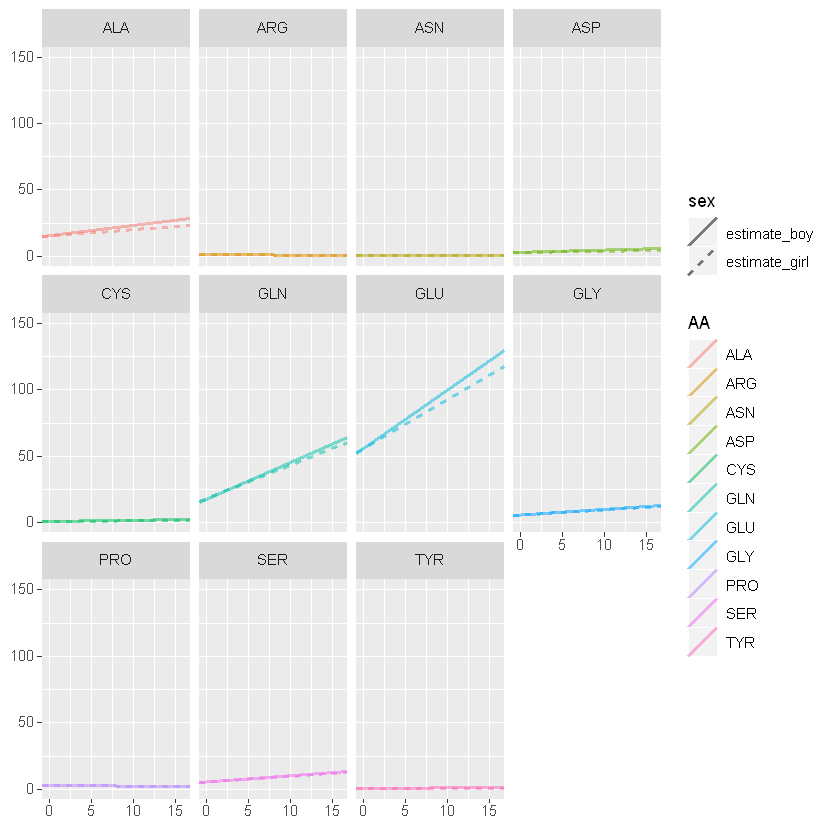

In [112]:
#png(filename="./plots/NE_SW_trends.png", units="cm", width=20, height=20, res = 300)
ggplot() + 
    scale_x_continuous(limits=c(0, 16)) +
    scale_y_continuous(limits=c(0, 150)) + 
    geom_abline(data=ablines_NE_SW, size = 1.1, alpha = 0.5,
                aes(slope = estimate, intercept = estimate.a_0, color = AA, linetype=sex)) + 
    facet_wrap(~AA)

#dev.off()

In [113]:
sexCoef_E_SW <- bind_rows(tidy_E_SW) %>% filter(grepl("^sexboy$", term)) %>% select(1:6)
sexCoef_NE_SW <- bind_rows(tidy_NE_SW) %>% filter(grepl("^sexboy$", term)) %>% select(1:6)

sexCoef_E_SW
sexCoef_NE_SW

effect,term,estimate,std.error,statistic,AA
fixed,sexboy,0.143092607,0.19317023,0.7407591,HIS
fixed,sexboy,0.174595018,0.12794612,1.3645980,ILE
fixed,sexboy,0.047945393,0.27163690,0.1765054,LEU
fixed,sexboy,0.409603825,0.28665438,1.4289118,LYS
fixed,sexboy,0.069296904,0.07633821,0.9077618,MET
fixed,sexboy,0.156944157,0.11224616,1.3982140,PHE
fixed,sexboy,-0.505636994,0.69988022,-0.7224622,THR
fixed,sexboy,0.009034879,0.02210311,0.4087605,TRP
fixed,sexboy,0.345219059,0.32126058,1.0745765,VAL


effect,term,estimate,std.error,statistic,AA
fixed,sexboy,0.31074934,0.1883314,1.65001388,ARG
fixed,sexboy,0.05185834,0.5953684,0.08710294,ASP
fixed,sexboy,-0.11682474,2.0649908,-0.05657397,ALA
fixed,sexboy,-0.13598389,0.1709738,-0.79534916,ASN
fixed,sexboy,0.20510859,0.2005285,1.02284025,CYS
fixed,sexboy,1.60275402,0.9899288,1.61905983,GLY
fixed,sexboy,10.52145458,8.2838069,1.27012311,GLU
fixed,sexboy,1.82734425,4.2196043,0.43306058,GLN
fixed,sexboy,0.57680676,0.4334495,1.33073566,PRO
fixed,sexboy,0.94959680,0.8621900,1.10137762,SER


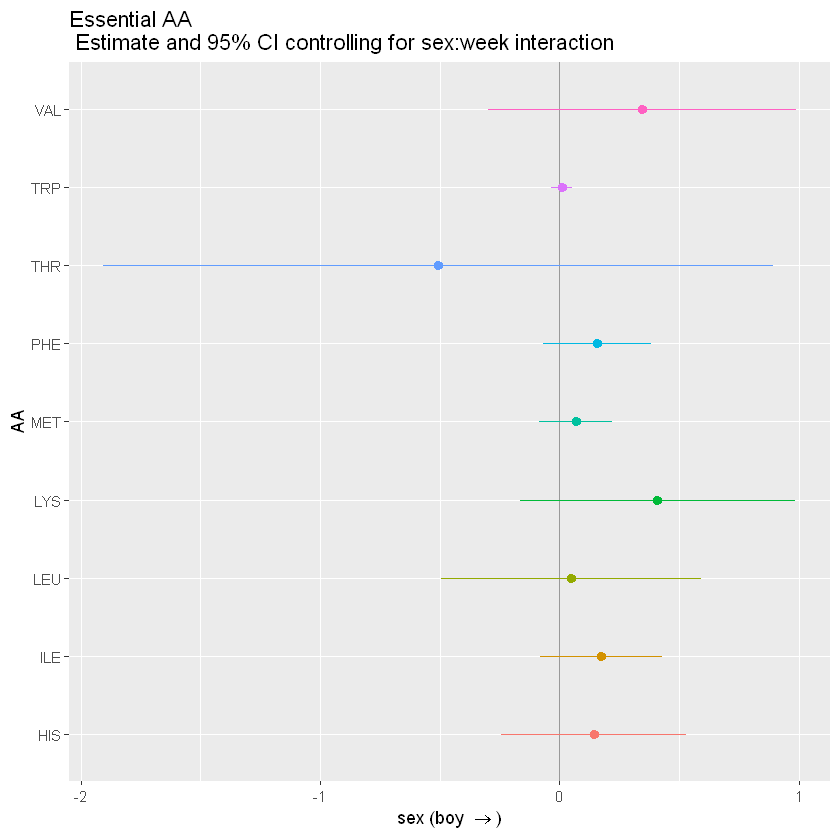

In [114]:
#png(filename="./plots/EAA_S_SW_coeff.png", units="cm", width=20, height=20, res = 300)
ggplot(sexCoef_E_SW, aes(x = AA, y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") + 
    coord_flip() + ylab(TeX('sex (boy $\\rightarrow$)')) + 
    ggtitle('Essential AA \n Estimate and 95% CI controlling for sex:week interaction') 
#dev.off()

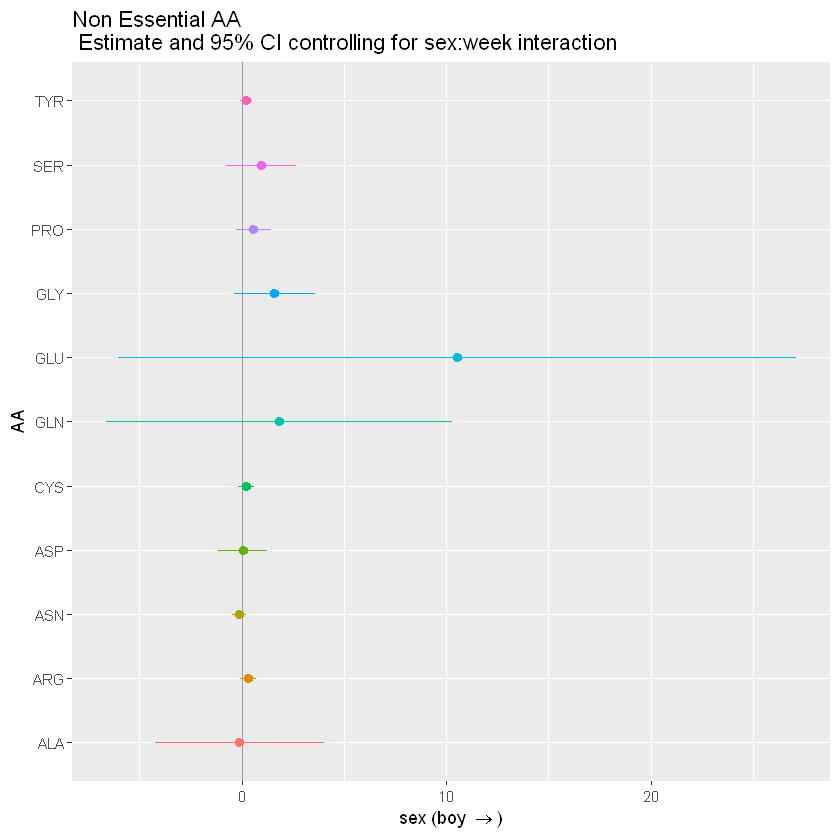

In [115]:
#png(filename="./plots/NEAA_S_SW_coeff.png", units="cm", width=20, height=20, res = 300)
ggplot(sexCoef_NE_SW, aes(x = AA, y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") + 
    coord_flip() + ylab(TeX('sex (boy $\\rightarrow$)')) + 
    ggtitle('Non Essential AA \n Estimate and 95% CI controlling for sex:week interaction') 
#dev.off()

In [116]:
swCoef_E_SW <- bind_rows(tidy_E_SW) %>% filter(grepl("^sexboy:week$", term)) %>% select(1:6)
swCoef_NE_SW <- bind_rows(tidy_NE_SW) %>% filter(grepl("^sexboy:week$", term)) %>% select(1:6)

swCoef_E_SW
swCoef_NE_SW

effect,term,estimate,std.error,statistic,AA
fixed,sexboy:week,0.006563508,0.022014670,0.29814245,HIS
fixed,sexboy:week,-0.015593924,0.013424397,-1.16161073,ILE
fixed,sexboy:week,-0.001675822,0.032484883,-0.05158774,LEU
fixed,sexboy:week,-0.040869984,0.033052873,-1.23650322,LYS
fixed,sexboy:week,-0.001314011,0.009170797,-0.14328206,MET
fixed,sexboy:week,-0.006803457,0.013601251,-0.50020817,PHE
fixed,sexboy:week,-0.036877869,0.063675043,-0.57915735,THR
fixed,sexboy:week,-0.002152543,0.002698552,-0.79766576,TRP
fixed,sexboy:week,-0.015064571,0.036182930,-0.41634468,VAL


effect,term,estimate,std.error,statistic,AA
fixed,sexboy:week,-0.030583438,0.02043535,-1.4965946,ARG
fixed,sexboy:week,0.090126567,0.06298104,1.4310110,ASP
fixed,sexboy:week,0.315024322,0.21872555,1.4402721,ALA
fixed,sexboy:week,0.009207942,0.02024970,0.4547199,ASN
fixed,sexboy:week,0.027507469,0.02096268,1.3122113,CYS
fixed,sexboy:week,0.038974710,0.10694446,0.3644388,GLY
fixed,sexboy:week,0.696378526,0.91003229,0.7652240,GLU
fixed,sexboy:week,0.222500884,0.45278705,0.4914029,GLN
fixed,sexboy:week,-0.034156864,0.04751160,-0.7189163,PRO
fixed,sexboy:week,0.049964560,0.09142594,0.5465031,SER


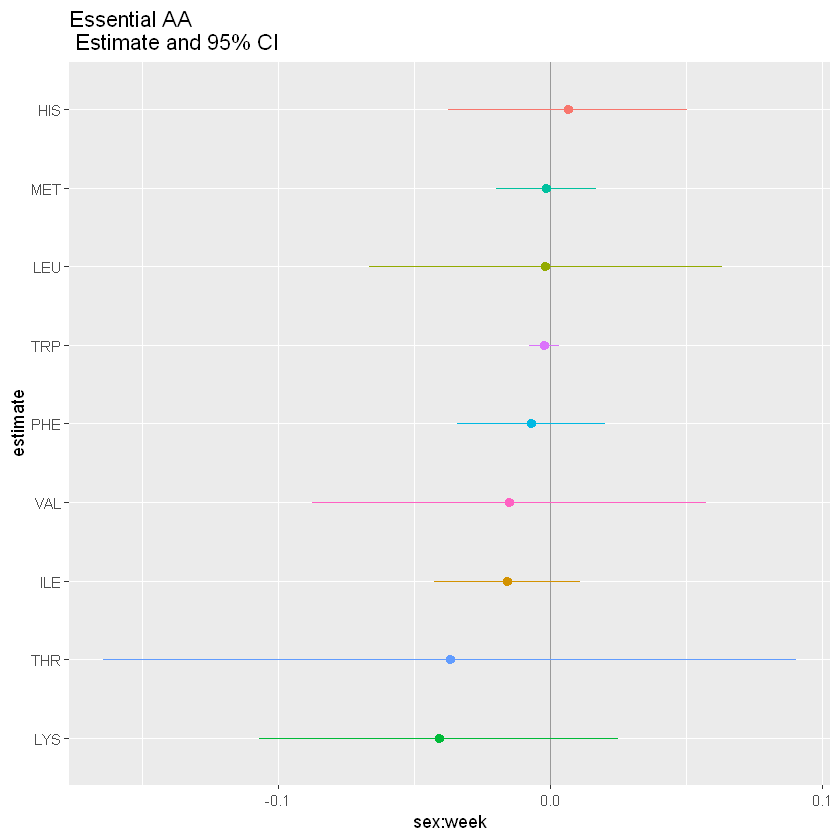

In [158]:
#png(filename="./plots/EAA_SW_SW_coeff.png", units="cm", width=20, height=20, res = 300)
ggplot(swCoef_E_SW, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") + 
    coord_flip() + 
    ggtitle('Essential AA \n Estimate and 95% CI') + ylab('sex:week') + xlab('estimate')
#dev.off()

In [133]:
AA_E_mean_plot_SEX <- 
 AA_E_Long %>% filter(!is.na(sex)) %>% group_by(week, sex, AA) %>% 
    summarise(mean = mean(level, na.rm = T), sd = sd(level, na.rm = T)) %>% 
    mutate(mean = round(mean, 2), sd = round(sd, 2)) 

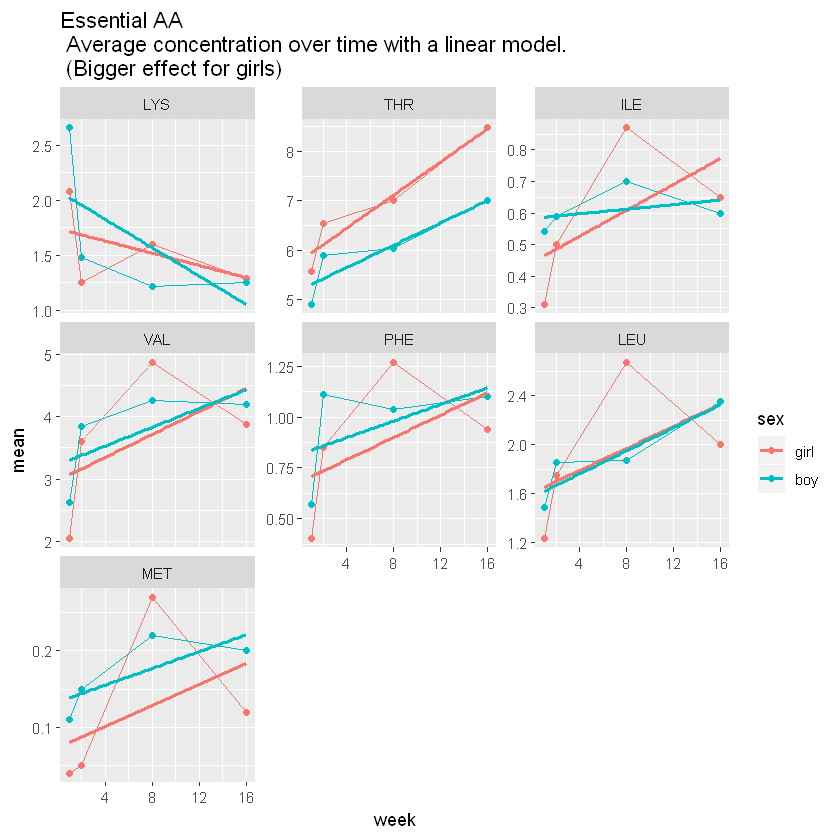

In [149]:
E_GIRLS <- AA_E_mean_plot_SEX %>% 
                filter(AA == 'THR' | AA == 'VAL' | AA == 'LEU' | AA == 'PHE' | 
                       AA == 'LYS' | AA == 'ILE' | AA == 'MET') %>%
                mutate(AA = factor(AA, levels = c('LYS', 'THR', 'ILE', 'VAL', 'PHE', 'LEU', 'MET')))

#png(filename="./plots/EAA_girls.png", units="cm", width=20, height=20, res = 300)
ggplot(E_GIRLS, aes(x = week, y = mean, color = sex)) + 
    geom_point() + geom_line() +
    facet_wrap(~AA,  scales = "free_y") + geom_smooth(method = lm, se = FALSE) +
    theme(aspect.ratio = 1) + 
    ggtitle('Essential AA \n Average concentration over time with a linear model. \n (Bigger effect for girls)')
#dev.off()

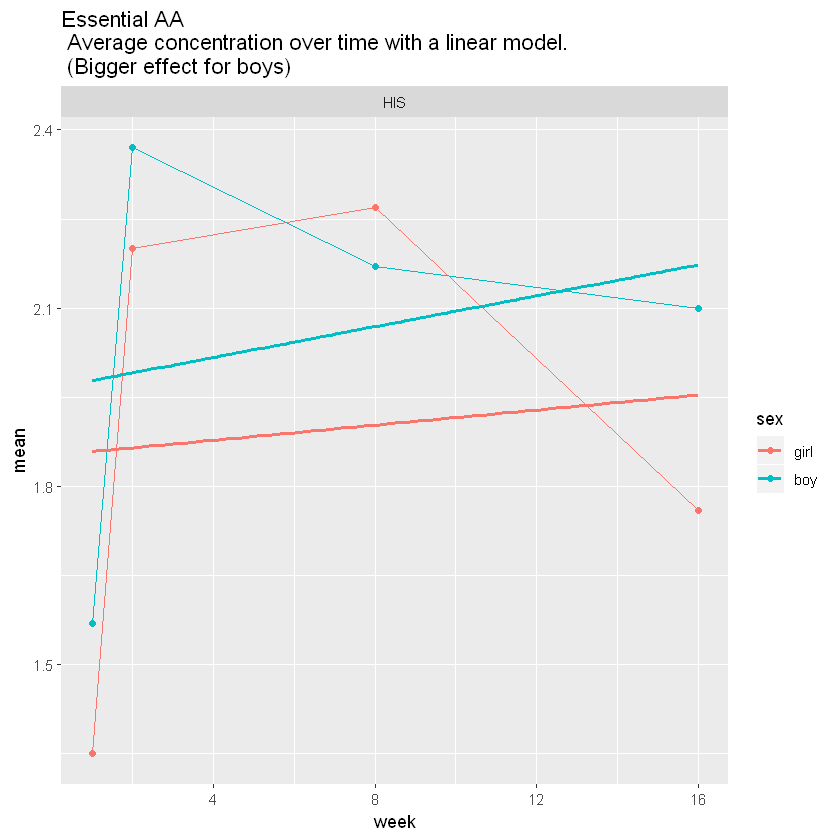

In [151]:
E_BOYS <- AA_E_mean_plot_SEX %>% filter(AA == 'HIS') 

#png(filename="./plots/EAA_boys.png", units="cm", width=20, height=20, res = 300)
ggplot(E_BOYS, aes(x = week, y = mean, color = sex)) + 
    geom_point() + geom_line() +
    facet_wrap(~AA,  scales = "free_y") + geom_smooth(method = lm, se = FALSE) +
    theme(aspect.ratio = 1) + 
    ggtitle('Essential AA \n Average concentration over time with a linear model. \n (Bigger effect for boys)')
#dev.off()

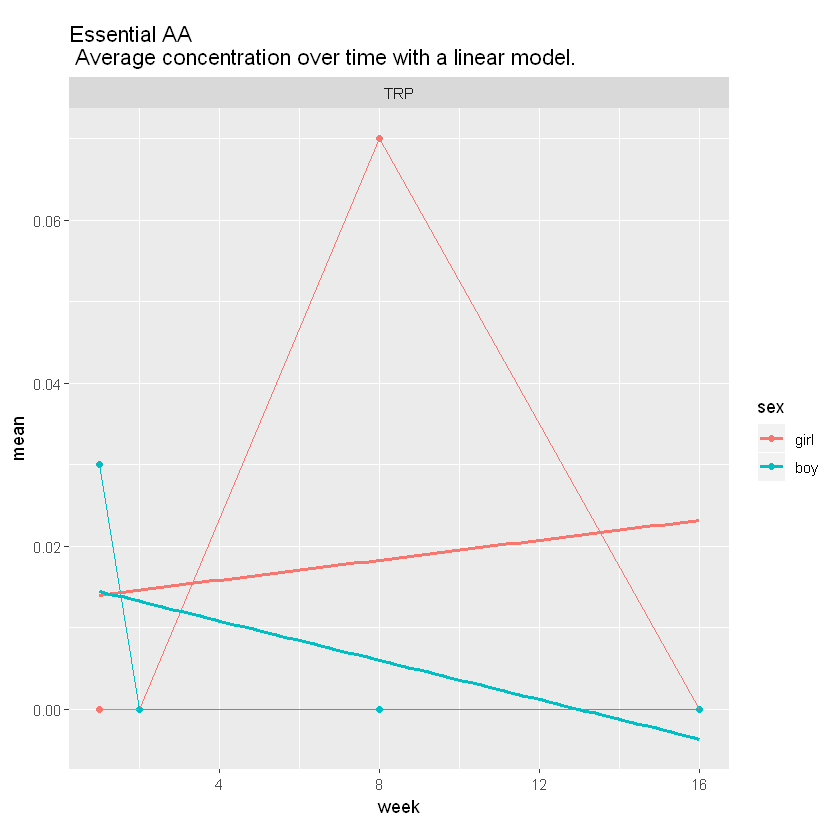

In [154]:
E_TRP <- AA_E_mean_plot_SEX %>% filter(AA == 'TRP') 

#png(filename="./plots/EAA_TRP.png", units="cm", width=20, height=20, res = 300)
ggplot(E_TRP, aes(x = week, y = mean, color = sex)) + 
    geom_point() + geom_line() +
    facet_wrap(~AA,  scales = "free_y") + geom_smooth(method = lm, se = FALSE) +
    theme(aspect.ratio = 1) + 
    ggtitle('Essential AA \n Average concentration over time with a linear model.')
#dev.off()

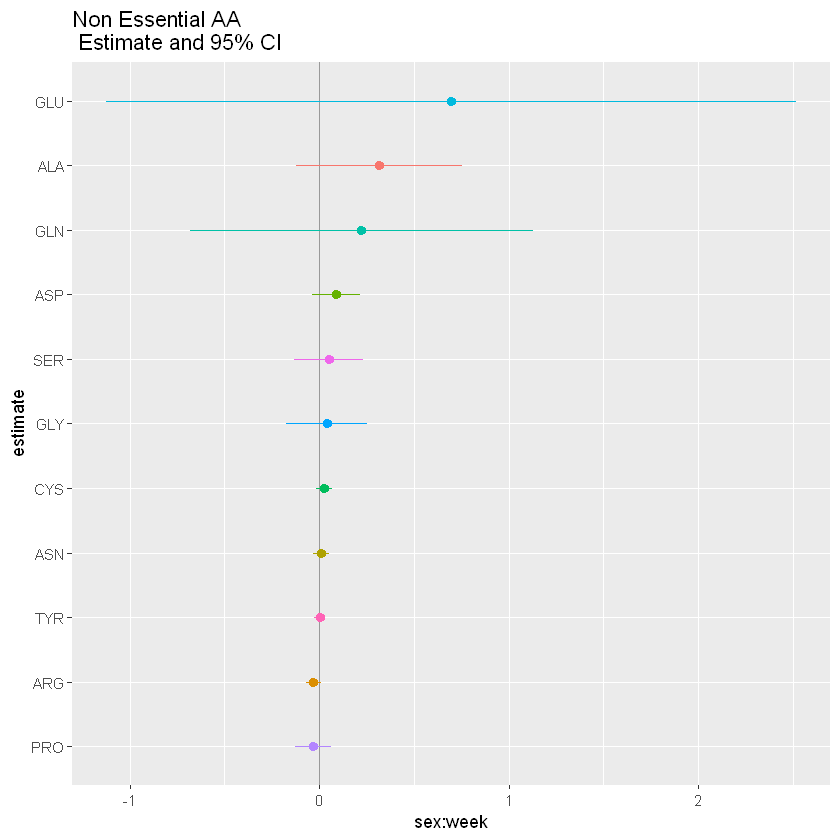

In [161]:
#png(filename="./plots/NEAA_SW_SW_coeff.png", units="cm", width=20, height=20, res = 300)
ggplot(swCoef_NE_SW, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") + 
    coord_flip() + 
    ggtitle('Non Essential AA \n Estimate and 95% CI') + ylab('sex:week') + xlab('estimate') 
#dev.off()

In [162]:
AA_NE_mean_plot_SEX <- 
 AA_NE_Long %>% filter(!is.na(sex)) %>% group_by(week, sex, AA) %>% 
    summarise(mean = mean(level, na.rm = T), sd = sd(level, na.rm = T)) %>% 
    mutate(mean = round(mean, 2), sd = round(sd, 2)) 

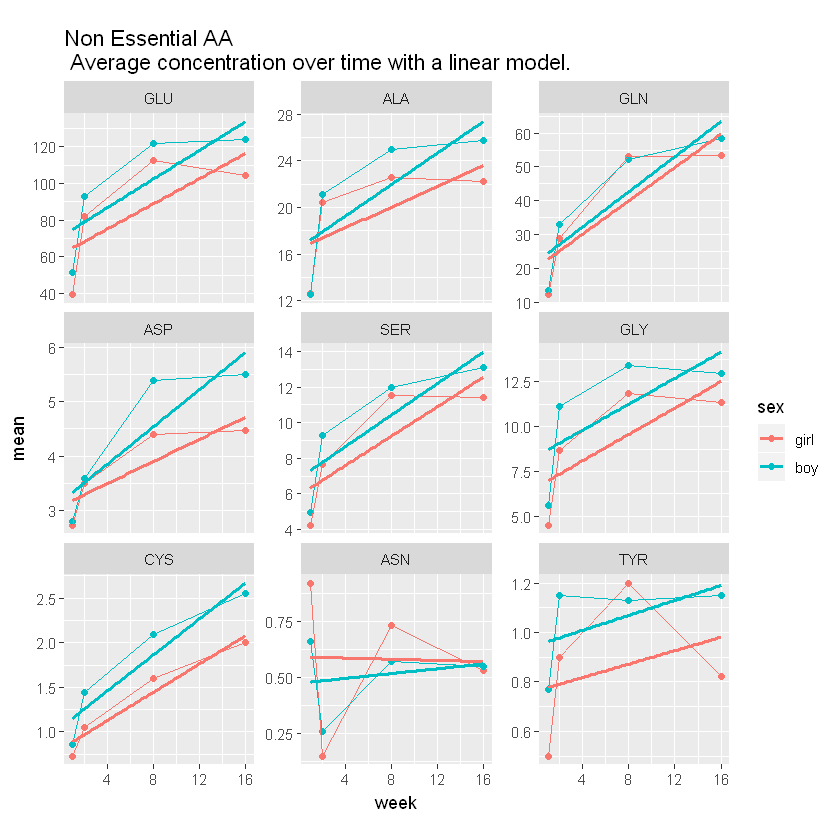

In [171]:
E_BOYS <- AA_NE_mean_plot_SEX %>% 
                filter(AA == 'GLU' | AA == 'ALA' | AA == 'GLN' | AA == 'ASP' | 
                       AA == 'SER' | AA == 'GLY' | AA == 'CYS' | AA == 'ASN' | AA == 'TYR') %>%
                mutate(AA = factor(AA, levels = c('GLU', 'ALA', 'GLN', 'ASP', 'SER', 'GLY', 'CYS', 'ASN', 'TYR')))

#png(filename="./plots/NEAA_boys.png", units="cm", width=20, height=20, res = 300)
ggplot(E_BOYS, aes(x = week, y = mean, color = sex)) + 
    geom_point() + geom_line() +
    facet_wrap(~AA,  scales = "free_y") + geom_smooth(method = lm, se = FALSE) +
    theme(aspect.ratio = 1) + 
    ggtitle('Non Essential AA \n Average concentration over time with a linear model.')
#dev.off()

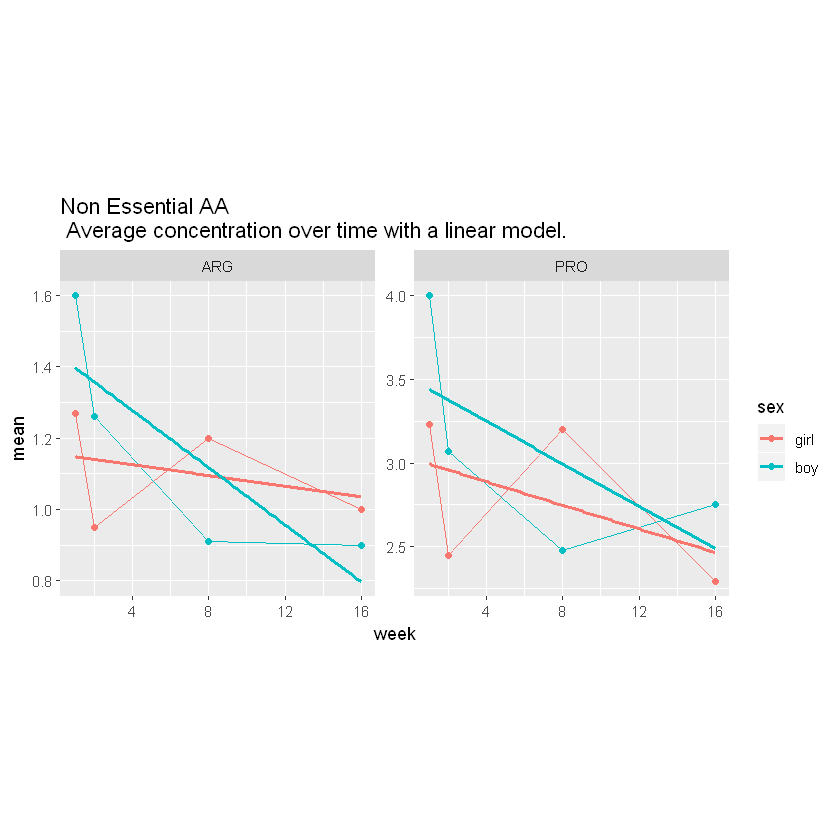

In [175]:
E_GIRLS <- AA_NE_mean_plot_SEX %>% 
                filter(AA == 'ARG' | AA == 'PRO') %>%
                mutate(AA = factor(AA, levels = c('ARG', 'PRO')))

#png(filename="./plots/NEAA_girls.png", units="cm", width=20, height=20, res = 300)
ggplot(E_GIRLS, aes(x = week, y = mean, color = sex)) + 
    geom_point() + geom_line() +
    facet_wrap(~AA,  scales = "free_y") + geom_smooth(method = lm, se = FALSE) +
    theme(aspect.ratio = 1) + 
    ggtitle('Non Essential AA \n Average concentration over time with a linear model.')
#dev.off()

## Week and Free AA



In [152]:
meWeek <- function(df){
    
    me <- lmer(level ~ week + (1 | id), data = df)
    
    return(me)
}

In [153]:
me_E_W <- list()
tidy_E_W <- list()

for(i in 1:nAA_E){
    
    me_E_W[[i]] <- meWeek(AA_E_Nested$data[[i]])
    tidy_E_W[[i]] <- tidy(me_E_W[[i]], effects = 'fixed') %>% mutate(AA = AA_E_Nested$AA[i])
   
}

In [154]:
me_NE_W <- list()
tidy_NE_W <- list()

for(i in 1:nAA_NE){
    
    me_NE_W[[i]] <- meWeek(AA_NE_Nested$data[[i]])
    tidy_NE_W[[i]] <- tidy(me_NE_W[[i]], effects = 'fixed') %>% mutate(AA = AA_NE_Nested$AA[i])

}

In [155]:
AA_E_Nested <- AA_E_Nested %>% mutate(model_W = me_E_W, tidy_W = tidy_E_W)
AA_NE_Nested <- AA_NE_Nested %>% mutate(model_W = me_NE_W, tidy_W = tidy_NE_W)

In [156]:
weekCoef_E <- bind_rows(tidy_E_W) %>% filter(grepl("week", term))
weekCoef_NE <- bind_rows(tidy_NE_W) %>% filter(grepl("week", term))

weekCoef_E
weekCoef_NE

effect,term,estimate,std.error,statistic,AA
fixed,week,0.018738164,0.010967849,1.708463,HIS
fixed,week,0.012731132,0.006733172,1.890807,ILE
fixed,week,0.049856423,0.015917927,3.132093,LEU
fixed,week,-0.059342986,0.018348179,-3.234271,LYS
fixed,week,0.006077201,0.004517861,1.345150,MET
fixed,week,0.028363731,0.006709344,4.227497,PHE
fixed,week,0.133049683,0.031251708,4.257357,THR
fixed,week,-0.001109411,0.001590644,-0.697460,TRP
fixed,week,0.096704532,0.018141917,5.330447,VAL


effect,term,estimate,std.error,statistic,AA
fixed,week,-0.0284400853,0.010809657,-2.630989,ARG
fixed,week,0.1510887926,0.032073629,4.710686,ASP
fixed,week,0.6653476156,0.109949524,6.051391,ALA
fixed,week,-0.0004539237,0.009832637,-0.046165,ASN
fixed,week,0.0958404519,0.010378179,9.234805,CYS
fixed,week,0.4175892468,0.052746777,7.916868,GLY
fixed,week,4.1506857471,0.461582247,8.992299,GLU
fixed,week,2.7038227854,0.222554713,12.149025,GLN
fixed,week,-0.0519788025,0.023221897,-2.238353,PRO
fixed,week,0.4639072569,0.044848180,10.343948,SER


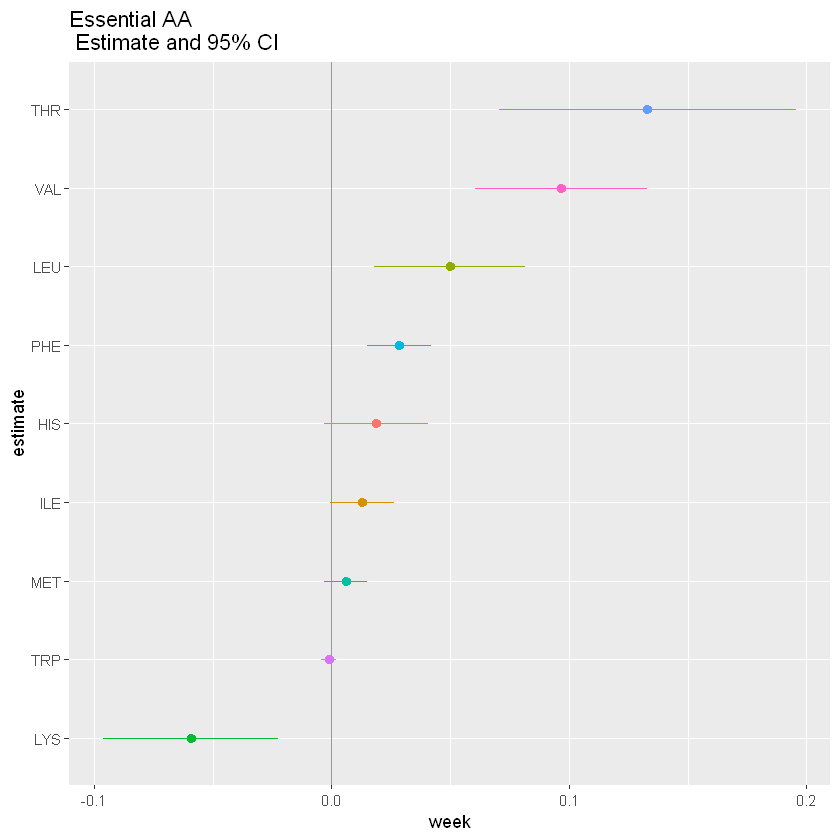

In [167]:
#png(filename="./plots/EAA_W_coeff.png", units="cm", width=20, height=20, res = 300)
ggplot(weekCoef_E, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") + 
    coord_flip() + xlab('estimate') + ylab('week') + 
    ggtitle('Essential AA \n Estimate and 95% CI') 
#dev.off()

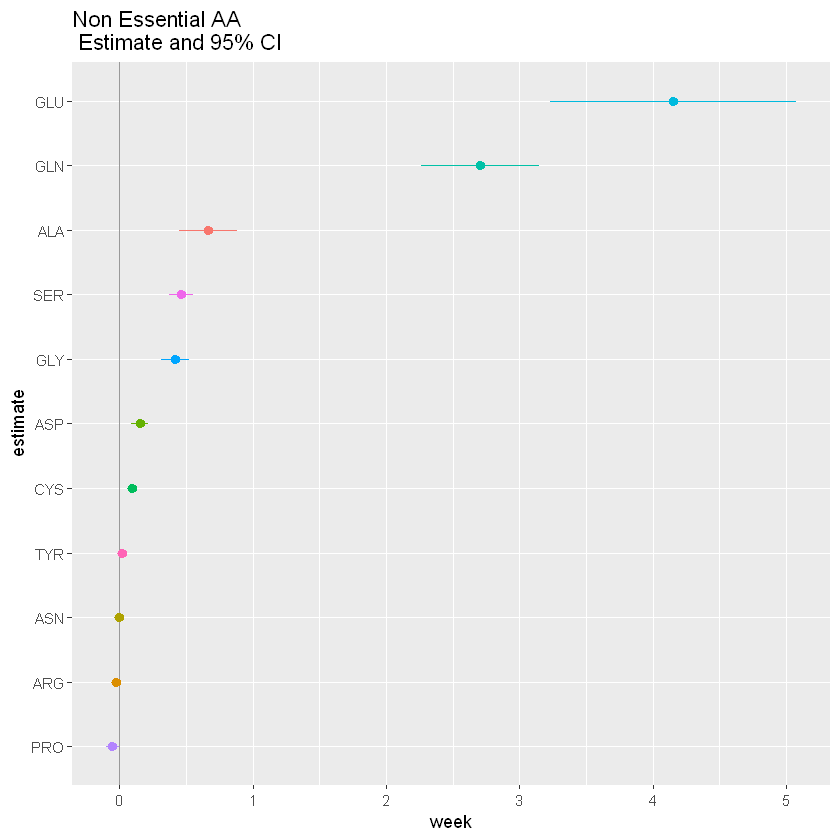

In [163]:
#png(filename="./plots/NEAA_W_coeff.png", units="cm", width=20, height=20, res = 300)
ggplot(weekCoef_NE, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") + 
    coord_flip() +  
    ggtitle('Non Essential AA \n Estimate and 95% CI') + xlab('estimate') + ylab('week') 
#dev.off()

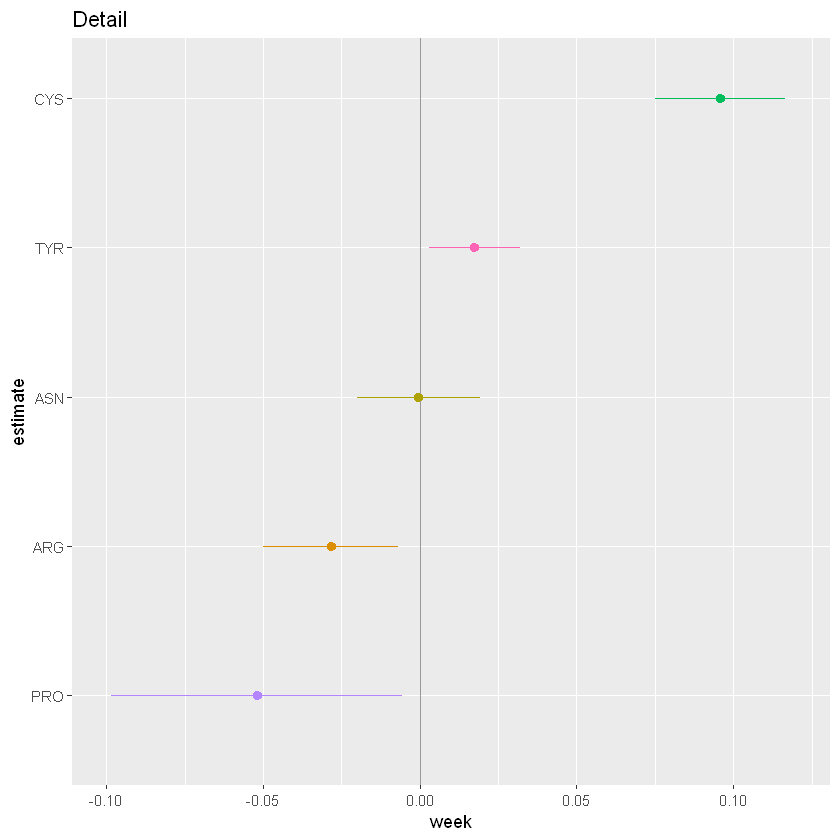

In [165]:
#png(filename="./plots/NEAA_W_coeff_detail.png", units="cm", width=20, height=20, res = 300)
ggplot(weekCoef_NE, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") + 
    coord_flip(ylim = c(-0.1, 0.12), xlim = c(1, 4.8)) +  
    ggtitle('Detail') + xlab('estimate') + ylab('week') 
#dev.off()

In [160]:
AA_E %>% na.omit() %>% group_by(sex) %>% summarise(n())

AA_E %>% group_by(sex) %>% summarise(n())

35 - 16
26 - 12

sex,n()
girl,12
boy,16


sex,n()
girl,26
boy,35
NA,4


[1] 19

[1] 14

In [161]:
AA_E %>% group_by(sex) %>% summarise_all(funs(sum(is.na(.))))

sex,id,group,age,HISCalostrum,HISTransition,HISMature2m,HISMature4m,ILECalostrum,ILETransition,...,THRMature2m,THRMature4m,TRPCalostrum,TRPTransition,TRPMature2m,TRPMature4m,VALCalostrum,VALTransition,VALMature2m,VALMature4m
girl,0,0,0,0,6,11,9,0,6,...,11,9,0,6,11,9,0,6,11,9
boy,0,0,0,0,8,12,15,0,8,...,12,15,0,8,12,15,0,8,12,15
NA,0,0,0,0,3,3,4,0,3,...,3,4,0,3,3,4,0,3,3,4
